## **Import modules and set display options**

In [165]:
# Import python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import re
import itertools
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [166]:
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 300)

In [167]:
# Import helper functions

## **Import and inspect the data**

In [168]:
DATA_PATH = '/course/a2/twitter/RPI_Expertise_2016_Features.csv'
raw = pd.read_csv(DATA_PATH, index_col=False, low_memory=False)

In [169]:
raw.head()

userid              utype      domain  followers  friends  \
0  5480470996  between100-10msgs  Technology     1796.0    165.0   
1  7280696314    morethan100msgs     Fitness     1699.0   1023.0   
2  1570594151    morethan100msgs  Technology     6382.0   6244.0   
3  9433661207             Random     Unknown      622.0    823.0   
4  6857720553  between100-10msgs  Technology    10766.0   9886.0   

   total_tweets     years    per_rt      chars    chars_rt    commas  \
0          45.0  3.043836  0.844444  77.285714  124.052632  0.285714   
1         352.0  2.126027  1.000000   0.000000  132.244318  0.000000   
2           5.0  5.227397  0.000000  61.200000    0.000000  0.000000   
3           7.0  5.926027  1.000000   0.000000  139.857143  0.000000   
4           1.0  5.043836  1.000000   0.000000  139.000000  0.000000   

   commas_rt   periods  periods_rt  quesmark  quesmark_rt  exmark  exmark_rt  \
0   0.236842  1.571429    1.947368       0.0     0.131579     0.0   0.000000   
1   0.414773  0.000000    1.406250       0.0     0.073864     0.0   0.386364   
2   0.000000  1.000000    0.000000       0.0     0.000000     0.0   0.000000   
3   0.428571  0.000000    1.571429       0.0     0.142857     0.0   0.142857   
4   0.000000  0.000000    2.000000       0.0     1.000000     0.0   1.000000   

      colon  colon_rt  semi   semi_rt  punc   punc_rt  tagpermsg  \
0  1.142857  2.631579   0.0  0.105263   3.0  5.052632        0.0   
1  0.000000  2.411932   0.0  0.090909   0.0  4.784091        0.0   
2  1.000000  0.000000   0.0  0.000000   2.0  0.000000        1.0   
3  0.000000  2.285714   0.0  0.000000   0.0  4.571429        0.0   
4  0.000000  3.000000   0.0  0.000000   0.0  7.000000        0.0   

   tagpermsg_rt  mentpermsg  mentpermsg_rt  urlpermsg  urlpermsg_rt  \
0      1.657895         1.0       1.421053   0.428571      1.000000   
1      3.363636         0.0       1.284091   0.000000      1.085227   
2      0.000000         0.0       0.000000   1.000000      0.000000   
3      1.285714         0.0       1.714286   0.000000      1.428571   
4      1.000000         0.0       1.000000   0.000000      2.000000   

   percent_msgwithment  percent_msgwithment_rt  percent_msgwithtag  \
0             0.571429                     1.0                 0.0   
1             0.000000                     1.0                 0.0   
2             0.000000                     0.0                 0.6   
3             0.000000                     1.0                 0.0   
4             0.000000                     1.0                 0.0   

   percent_msgwithtag_rt  percent_msgwithurl  percent_msgwithurl_rt  \
0               0.710526            0.428571               0.947368   
1               1.000000            0.000000               1.000000   
2               0.000000            1.000000               0.000000   
3               0.857143            0.000000               0.857143   
4               1.000000            0.000000               1.000000   

         first  verb_phrase  noun_phrase interj    stopwords        slang  \
0  0.086956522  0.652173913  2.695652174      1  0.695652174  0.260869565   
1  0.629411765  1.276470588  3.988235294    0.4  2.641176471  1.311764706   
2            0            0  0.333333333      0            0            0   
3         0.75         0.25         3.25   0.25         0.75         1.25   
4            0            3            5      0            3            3   

     sentiment       entity    active_vb     modal_vb  negative_vb  \
0  0.043478261   0.47826087  0.217391304  0.086956522  0.217391304   
1  0.282352941  0.794117647  0.347058824  0.347058824  1.029411765   
2            0            0            0            0            0   
3          0.5         1.25            0         0.75          1.5   
4            0            0            2            1            1   

            dt num_en    org_avg_d  ...  Unnamed: 108  Unnamed: 109  \
0  0.173913043     23  3.428571429  ...      

In [170]:
raw.tail()

userid            utype   domain  followers  friends  total_tweets  \
5277  4249953361  morethan100msgs  Fitness      283.0     65.0        2342.0   
5278  6875118252           friend  Fitness     1560.0   1996.0           1.0   
5279  6100001786        mentioned  Science      364.0    396.0          24.0   
5280  7760138239           friend  Unknown     3703.0   2079.0        1267.0   
5281  1891481779              NaN      NaN        NaN      NaN           NaN   

         years    per_rt       chars    chars_rt    commas  commas_rt  \
5277  1.846575  0.014518  114.548094  122.882353  0.208406   0.147059   
5278  7.704110  0.000000   51.000000    0.000000  0.000000   0.000000   
5279  5.364384  0.208333  101.789474  132.400000  0.263158   0.200000   
5280  5.087671  0.125493   64.301444  105.484277  0.056859   0.176101   
5281       NaN       NaN         NaN         NaN       NaN        NaN   

       periods  periods_rt  quesmark  quesmark_rt    exmark  exmark_rt  \
5277  3.100953    3.558824  0.044627     0.088235  0.379549   0.411765   
5278  1.000000    0.000000  0.000000     0.000000  0.000000   0.000000   
5279  1.947368    0.800000  0.473684     0.400000  0.473684   0.400000   
5280  0.395307    1.044025  0.216606     0.207547  0.360108   0.459119   
5281       NaN         NaN       NaN          NaN       NaN        NaN   

         colon  colon_rt      semi   semi_rt      punc   punc_rt  tagpermsg  \
5277  1.081023  1.088235  0.033795  0.058824  4.848354  5.352941   4.339255   
5278  1.000000  0.000000  0.000000  0.000000  2.000000  0.000000   2.000000   
5279  0.894737  1.800000  0.368421  0.200000  4.421053  3.800000   0.000000   
5280  0.209386  1.540881  0.017148  0.050314  1.255415  3.477987   0.022563   
5281       NaN       NaN       NaN       NaN       NaN       NaN        NaN   

      tagpermsg_rt  mentpermsg  mentpermsg_rt  urlpermsg  urlpermsg_rt  \
5277      3.352941    0.098787       0.117647   0.003899      0.000000   
5278      0.000000    0.000000       0.000000   1.000000      0.000000   
5279      0.000000    0.894737       1.400000   0.473684      0.800000   
5280      0.194969    1.161552       1.792453   0.017148      0.144654   
5281           NaN         NaN            NaN        NaN           NaN   

      percent_msgwithment  percent_msgwithment_rt  percent_msgwithtag  \
5277             0.068458                0.117647            0.715771   
5278             0.000000                0.000000            1.000000   
5279             0.631579                1.000000            0.000000   
5280             0.781588                1.000000            0.018953   
5281                  NaN                     NaN                 NaN   

      percent_msgwithtag_rt  percent_msgwithurl  percent_msgwithurl_rt  \
5277               0.529412            0.003899               0.000000   
5278               0.000000            1.000000               0.000000   
5279               0.000000            0.473684               0.800000   
5280               0.163522            0.016245               0.144654   
5281                    NaN                 NaN                    NaN   

            first  verb_phrase  noun_phrase       interj    stopwords  \
5277   0.48318872  0.327006508  1.909978308  1.878524946  0.296095445   
5278            0            0            2            0            0   
5279  0.444444444  1.944444444  4.444444444  1.666666667  3.388888889   
5280   0.40166205  1.666666667  3.280701754  0.701754386  3.291782087   
5281          NaN          NaN          NaN          NaN          NaN   

            slang    sentiment       entity    active_vb     modal_vb  \
5277   0.67462039  0.039587852  0.234273319  0.056941432  0.443600868   
5278            0            0            1            0            0   
5279  1.777777778  0.166666667  0.444444444  0.277777778  0.611111111   
5280  0.825484765  0.516158818   0.14312096  0.487534626  0.335180055   
5281          NaN          NaN       

In [171]:
print(f'There are {raw.shape[0]} rows and {raw.shape[1]} columns in the dataset')

There are 5282 rows and 158 columns in the dataset


In [172]:
raw.describe().round(2)

userid    followers     friends  total_tweets    years   per_rt  \
count  5.282000e+03      5281.00     5281.00       5281.00  5281.00  5281.00   
mean   5.478637e+09     86233.65     4095.70        355.36     4.52     0.39   
std    2.594389e+09   1228234.40    33407.43       1436.30     2.17     0.41   
min    1.000658e+09         0.00        0.00          1.00     0.12     0.00   
25%    3.250578e+09       289.00      206.00          2.00     2.50     0.00   
50%    5.516101e+09      1093.00      651.00         18.00     4.58     0.21   
75%    7.657773e+09      4842.00     1866.00        120.00     6.53     0.95   
max    9.999511e+09  57231986.00  1578505.00      23948.00     9.80     1.00   

         chars  chars_rt   commas  commas_rt  periods  periods_rt  quesmark  \
count  5281.00   5281.00  5281.00    5281.00  5281.00     5281.00   5281.00   
mean     77.34     84.91     0.21       0.21     1.20        1.12      0.10   
std      47.54     54.93     0.36       0.43     1.09        1.05      0.27   
min       0.00      0.00     0.00       0.00     0.00        0.00      0.00   
25%      40.00      0.00     0.00       0.00     0.00        0.00      0.00   
50%      93.00    112.09     0.07       0.00     1.08        1.00      0.00   
75%     114.28    128.60     0.30       0.29     1.73        1.66      0.10   
max     152.00    146.00     6.28       9.00    10.00       11.00      3.00   

       quesmark_rt   exmark  exmark_rt    colon  colon_rt     semi  semi_rt  \
count      5281.00  5281.00    5281.00  5281.00   5281.00  5281.00  5281.00   
mean          0.06     0.17       0.16     0.84      1.45     0.06     0.06   
std           0.17     0.36       0.39     0.78      1.08     0.20     0.20   
min           0.00     0.00       0.00     0.00      0.00     0.00     0.00   
25%           0.00     0.00       0.00     0.00      0.00     0.00     0.00   
50%           0.00     0.00       0.00     0.92      1.67     0.00     0.00   
75%           0.05     0.20       0.17     1.25      2.17     0.04     0.04   
max           2.00     7.00       9.00     5.67      7.00     3.76     5.00   

          punc  punc_rt  tagpermsg  tagpermsg_rt  mentpermsg  mentpermsg_rt  \
count  5281.00  5281.00    5281.00       5281.00     5281.00        5281.00   
mean      2.59     3.06       1.09          0.96        0.48           0.99   
std       1.96     2.27       1.61          1.56        0.74           0.98   
min       0.00     0.00       0.00          0.00        0.00           0.00   
25%       0.61     0.00       0.00          0.00        0.00           0.00   
50%       2.73     3.60       0.40          0.33        0.05           1.00   
75%       3.81     4.64       1.60          1.20        0.89           1.50   
max      16.00    21.00      14.38         16.00        8.76          10.00   

       urlpermsg  urlpermsg_rt  percent_msgwithment  percent_msgwithment_rt  \
count    5281.00       5281.00              5281.00                 5281.00   
mean        0.58          0.51                 0.31                    0.67   
std         0.55          0.55                 0.38                    0.46   
min         0.00          0.00                 0.00                    0.00   
25%         0.00          0.00                 0.00                    0.00   
50%         0.56          0.40                 0.05                    1.00   
75%         1.00          1.00                 0.64                    1.00   
max         4.00          3.00                 1.00                    1.00   

       percent_msgwithtag  percent_msgwithtag_rt  percent_msgwithurl  \
count             5281.00                5281.00             5281.00   
mean                 0.42                   0.46                0.51   
std                  0.42                   0.45                0.44   
min                  0.00                   0.00                0.00   
25%                  0.00                   0.00                0.00   
50%         

## **Initial Cleaning of the Data**

In [173]:
# Make a copy of the data
df = raw.copy()

**Delete rows and columns containing either 90% or more than 90% NaN Values**

In [174]:
# Delete rows and columns containing either 90% or more than 90% NaN Values
threshold = 90.0
# Delete columns 
threshold = 90.0
min_count =  int(((100-threshold)/100)*df.shape[0] + 1)
df.dropna( axis=1, thresh=min_count, inplace = True)
df.shape
# Delete rows
threshold = 90.0
min_count =  int(((100-threshold)/100)*df.shape[1] + 1)
df.dropna( axis=0, thresh=min_count, inplace = True)
df.shape

(5281, 72)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281 entries, 0 to 5280
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   userid                         5281 non-null   int64  
 1   utype                          5281 non-null   object 
 2   domain                         5281 non-null   object 
 3   followers                      5281 non-null   float64
 4   friends                        5281 non-null   float64
 5   total_tweets                   5281 non-null   float64
 6   years                          5281 non-null   float64
 7   per_rt                         5281 non-null   float64
 8   chars                          5281 non-null   float64
 9   chars_rt                       5281 non-null   float64
 10  commas                         5281 non-null   float64
 11  commas_rt                      5281 non-null   float64
 12  periods                        5281 non-null   f

**Format columns names and merge columns**

In [176]:
# Strip whitespaces
df.rename(columns=lambda x: x.strip(), inplace = True)
# Rename topic coherence columns
df.rename( columns={'Unnamed: 71':'topic_coherence_2'}, inplace=True )

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281 entries, 0 to 5280
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   userid                         5281 non-null   int64  
 1   utype                          5281 non-null   object 
 2   domain                         5281 non-null   object 
 3   followers                      5281 non-null   float64
 4   friends                        5281 non-null   float64
 5   total_tweets                   5281 non-null   float64
 6   years                          5281 non-null   float64
 7   per_rt                         5281 non-null   float64
 8   chars                          5281 non-null   float64
 9   chars_rt                       5281 non-null   float64
 10  commas                         5281 non-null   float64
 11  commas_rt                      5281 non-null   float64
 12  periods                        5281 non-null   f

In [178]:
# Merge topic coherence columns
def merge_topic_coherence(row):
    # If the first row has a value present, and the second row does not, return the first value
    if (row['topic_coherence'] != 'None' and not pd.isna(row['topic_coherence'])):
        return row['topic_coherence']
    # Else if the first row does not have a value present, and the second row does, return the second value
    elif ((row['topic_coherence'] == 'None' or pd.isna(row['topic_coherence'])) and (row['topic_coherence_2'] != 'None' and not pd.isna(row['topic_coherence_2']))):
        return row['topic_coherence_2']
    # Else if the first row and the second row are None, return None
    elif (row['topic_coherence'] == 'None' and row['topic_coherence_2'] == 'None'):
        return row['topic_coherence']
    # Else if the first row and the second row are null, return null
    elif (pd.isna(row['topic_coherence']) and pd.isna(row['topic_coherence_2'])):
          return row['topic_coherence']
    else:
          return "Error"

In [179]:
df['topic_coherence_merged'] = df.apply(lambda x: merge_topic_coherence(x), axis = 1)
# Check transformation
num_merge_errors = df[df['topic_coherence_merged'] == "Error"]['userid'].count()
# Check null values
num_nulls = df[pd.isna(df['topic_coherence_merged'])]['userid'].count()
# Check none values
num_nones = df[df['topic_coherence_merged'] == "None"]['userid'].count()
print(f'Errors: {num_merge_errors}, nulls: {num_nulls}, nones: {num_nones}')

Errors: 0, nulls: 3, nones: 2618


In [180]:
df.drop(labels = ['topic_coherence', 'topic_coherence_2'], axis = 1, inplace = True)

In [181]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281 entries, 0 to 5280
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   userid                         5281 non-null   int64  
 1   utype                          5281 non-null   object 
 2   domain                         5281 non-null   object 
 3   followers                      5281 non-null   float64
 4   friends                        5281 non-null   float64
 5   total_tweets                   5281 non-null   float64
 6   years                          5281 non-null   float64
 7   per_rt                         5281 non-null   float64
 8   chars                          5281 non-null   float64
 9   chars_rt                       5281 non-null   float64
 10  commas                         5281 non-null   float64
 11  commas_rt                      5281 non-null   float64
 12  periods                        5281 non-null   f

## **Initial Data Exploration**

### **Dependent feature**

In [182]:
df['utype'].value_counts()

Random               1110
morethan100msgs       941
between100-10msgs     920
between10-3msgs       899
mentioned             862
friend                349
expert                199
between10-10msgs        1
Name: utype, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

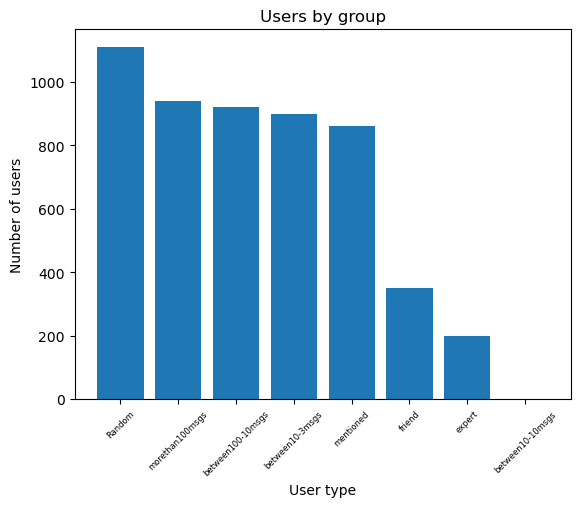

In [183]:
data = df['utype'].value_counts()
plt.bar(data.index, data)
plt.title('Users by group')
plt.xlabel('User type', fontsize=10)
plt.ylabel('Number of users', fontsize=10)
plt.xticks(rotation = 45, fontsize=6)

In [184]:
utype_mean = df.groupby(['utype']).mean()
utype_mean.round(2)

userid  followers   friends  total_tweets  years  \
utype                                                                       
Random             5.475339e+09    7079.04   1691.50         31.11   4.60   
between10-10msgs   3.695350e+09    1317.00   2037.00        469.00   2.56   
between10-3msgs    5.557186e+09    7194.48   1991.40        163.03   4.28   
between100-10msgs  5.506575e+09   10252.42   3860.22        315.22   4.16   
expert             5.487529e+09  317362.09  27800.14         77.19   7.33   
friend             5.524513e+09   66788.73   9521.90         71.95   6.25   
mentioned          5.442709e+09  394493.56   3550.29         69.20   5.69   
morethan100msgs    5.399893e+09    5444.23   2648.67       1386.81   2.74   

                   per_rt   chars  chars_rt  commas  commas_rt  periods  \
utype                                                                     
Random               0.75   23.97     86.22    0.07       0.23     0.33   
between10-10msgs     0.85  126.21    111.80    0.13       0.10     1.84   
between10-3msgs      0.34   89.76     85.61    0.24       0.21     1.32   
between100-10msgs    0.28   95.81     79.46    0.22       0.19     1.48   
expert               0.24   94.45     89.20    0.35       0.26     1.43   
friend               0.30   70.67     67.45    0.21       0.18     1.19   
mentioned            0.27   96.29     92.75    0.30       0.26     1.42   
morethan100msgs      0.30   91.81     86.35    0.22       0.14     1.60   

                   periods_rt  quesmark  quesmark_rt  exmark  exmark_rt  \
utype                                                                     
Random                   1.13      0.06         0.05    0.07       0.13   
between10-10msgs         2.18      0.21         0.61    1.07       0.18   
between10-3msgs          1.09      0.09         0.06    0.25       0.20   
between100-10msgs        1.03      0.11         0.07    0.19       0.18   
expert                   1.09      0.13         0.09    0.23       0.17   
friend                   0.87      0.10         0.05    0.24       0.15   
mentioned                1.12      0.14         0.08    0.28       0.22   
morethan100msgs          1.29      0.10         0.04    0.08       0.11   

                   colon  colon_rt  semi  semi_rt  punc  punc_rt  tagpermsg  \
utype                                                                         
Random              0.11      1.47  0.01     0.04  0.66     3.06       0.11   
between10-10msgs    1.81      2.17  0.00     0.07  5.07     5.31       1.13   
between10-3msgs     0.93      1.48  0.07     0.08  2.90     3.13       1.31   
between100-10msgs   1.12      1.34  0.09     0.06  3.20     2.87       1.82   
expert              0.85      1.46  0.08     0.08  3.08     3.16       0.32   
friend              0.66      1.19  0.06     0.06  2.45     2.49       0.32   
mentioned           0.98      1.55  0.10     0.08  3.22     3.31       0.56   
morethan100msgs     1.26      1.50  0.06     0.06  3.33     3.15       2.25   

                   tagpermsg_rt  mentpermsg  mentpermsg_rt  urlpermsg  \
utype                                                                   
Random                     0.42        0.38           1.07       0.07   
between10-10msgs           1.86        0.00           0.00       1.81   
between10-3msgs            0.83        0.56           1.07       0.65   
between100-10msgs          1.13        0.43           0.86       0.79   
expert                     0.50        0.76           1.33       0.60   
friend                     0.34        0.53           0.94       0.46   
mentioned                  0.56        0.77           1.40       0.65   
morethan100msgs            2.27        0.24           0.55       0.86   

                   urlpermsg_rt  percent_msgwithment  percent_msgwithment_rt  \
utype                                                                          
Random                     0.28                 0.26                  

In [185]:
utype_median = df.groupby(['utype']).median()
utype_median.round(2)

userid  followers  friends  total_tweets  years  \
utype                                                                      
Random             5.510064e+09      517.5    502.5           1.0   4.69   
between10-10msgs   3.695350e+09     1317.0   2037.0         469.0   2.56   
between10-3msgs    5.753310e+09      726.0    689.0          20.0   4.21   
between100-10msgs  5.611984e+09     1102.5    912.0          47.0   3.98   
expert             5.518268e+09    41561.0   1206.0          26.0   7.12   
friend             5.501025e+09     2511.0   1245.0           5.0   6.63   
mentioned          5.402468e+09     4548.0    703.0          16.0   6.15   
morethan100msgs    5.431513e+09      696.0    275.0         372.0   2.09   

                   per_rt   chars  chars_rt  commas  commas_rt  periods  \
utype                                                                     
Random               1.00    0.00     97.00    0.00       0.00     0.00   
between10-10msgs     0.85  126.21    111.80    0.13       0.10     1.84   
between10-3msgs      0.21   99.00    114.91    0.14       0.00     1.20   
between100-10msgs    0.06  103.33    112.00    0.14       0.00     1.24   
expert               0.14   97.77    121.20    0.31       0.11     1.37   
friend               0.12   79.53     83.80    0.00       0.00     1.00   
mentioned            0.20  101.80    121.03    0.23       0.09     1.38   
morethan100msgs      0.01  106.64    115.71    0.10       0.00     1.26   

                   periods_rt  quesmark  quesmark_rt  exmark  exmark_rt  \
utype                                                                     
Random                   1.00      0.00         0.00    0.00       0.00   
between10-10msgs         2.18      0.21         0.61    1.07       0.18   
between10-3msgs          1.14      0.02         0.00    0.05       0.00   
between100-10msgs        1.00      0.02         0.00    0.03       0.00   
expert                   1.20      0.08         0.00    0.11       0.00   
friend                   1.00      0.00         0.00    0.00       0.00   
mentioned                1.15      0.08         0.00    0.14       0.00   
morethan100msgs          1.14      0.01         0.00    0.00       0.00   

                   colon  colon_rt  semi  semi_rt  punc  punc_rt  tagpermsg  \
utype                                                                         
Random              0.00      1.01  0.00     0.00  0.00     3.00       0.00   
between10-10msgs    1.81      2.17  0.00     0.07  5.07     5.31       1.13   
between10-3msgs     1.00      1.82  0.00     0.00  3.00     3.88       1.00   
between100-10msgs   1.06      1.60  0.00     0.00  3.00     3.60       1.38   
expert              0.86      1.82  0.00     0.00  3.19     4.00       0.11   
friend              0.50      1.38  0.00     0.00  2.49     3.00       0.00   
mentioned           1.00      1.92  0.00     0.00  3.20     4.00       0.32   
morethan100msgs     1.14      1.67  0.01     0.00  3.10     3.80       1.90   

                   tagpermsg_rt  mentpermsg  mentpermsg_rt  urlpermsg  \
utype                                                                   
Random                     0.00        0.00           1.00       0.00   
between10-10msgs           1.86        0.00           0.00       1.81   
between10-3msgs            0.50        0.33           1.10       0.75   
between100-10msgs          0.67        0.06           1.00       0.99   
expert                     0.24        0.79           1.49       0.60   
friend                     0.00        0.15           1.00       0.22   
mentioned                  0.33        0.71           1.43       0.63   
morethan100msgs            1.67        0.00           0.00       1.00   

                   urlpermsg_rt  percent_msgwithment  percent_msgwithment_rt  \
utype                                                                          
Random                     0.00                 0.00                    1.00   


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

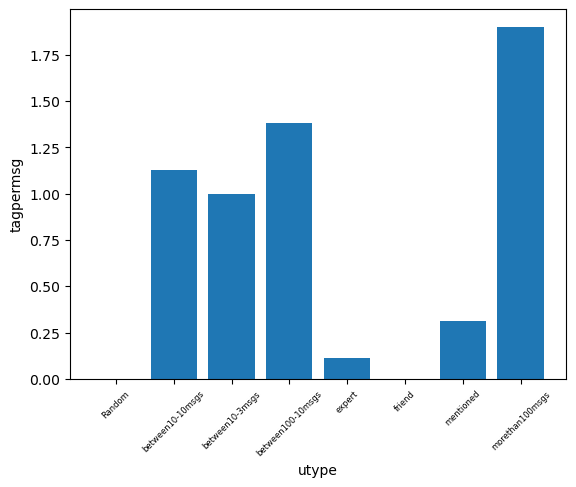

In [186]:
field = 'tagpermsg'
data = utype_median[field]
plt.bar(data.index, data)
plt.xlabel('utype', fontsize=10)
plt.ylabel(field, fontsize=10)
plt.xticks(rotation = 45, fontsize=6)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

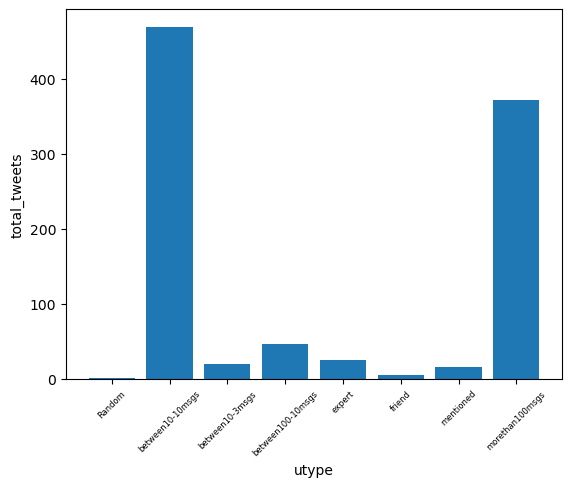

In [187]:
field = 'total_tweets'
data = utype_median[field]
plt.bar(data.index, data)
plt.xlabel('utype', fontsize=10)
plt.ylabel(field, fontsize=10)
plt.xticks(rotation = 45, fontsize=6)

In [188]:
# Inspect data issue
df[df['utype'] == 'between10-10msgs']

userid             utype   domain  followers  friends  total_tweets  \
3118  3695349705  between10-10msgs  Fitness     1317.0   2037.0         469.0   

         years    per_rt       chars    chars_rt    commas  commas_rt  \
3118  2.556164  0.850746  126.214286  111.804511  0.128571   0.097744   

       periods  periods_rt  quesmark  quesmark_rt    exmark  exmark_rt  \
3118  1.842857    2.177945  0.214286     0.614035  1.071429   0.182957   

         colon  colon_rt  semi   semi_rt      punc   punc_rt  tagpermsg  \
3118  1.814286   2.16792   0.0  0.067669  5.071429  5.308271   1.128571   

      tagpermsg_rt  mentpermsg  mentpermsg_rt  urlpermsg  urlpermsg_rt  \
3118      1.864662         0.0            0.0   1.814286      2.157895   

      percent_msgwithment  percent_msgwithment_rt  percent_msgwithtag  \
3118                  0.0                     1.0            0.785714   

      percent_msgwithtag_rt  percent_msgwithurl  percent_msgwithurl_rt  \
3118                    1.0                 1.0                    1.0   

            first  verb_phrase  noun_phrase       interj    stopwords  \
3118  0.057692308  1.473076923  2.492307692  0.892307692  1.853846154   

            slang    sentiment       entity    active_vb     modal_vb  \
3118  0.953846154  0.238461538  0.026923077  0.115384615  0.153846154   

      negative_vb           dt num_en    org_avg_d  org_med  org_avg_d_np  \
3118  0.461538462  0.330769231    260  6.583941606      6.0      3.043796   

      org_med_np  org_avg_d_vp  org_med_vp   pot_org  rt_avg_d  rt_med  \
3118         2.0      5.688525         5.0  0.877698  6.102981     5.0   

      rt_avg_d_np  rt_med_np  rt_avg_d_vp  rt_med_vp    pot_rt        lexco  \
3118     3.184573        2.0      5.08805        4.0  0.895722  0.140376217   

     glowbe_glowbe_dist_minval glowbe_glowbe_dist_min3val  \
3118               0.438377143                0.261924296   

     glowbe_glowbe_dist_minval_rt glowbe_glowbe_dist_min3val_rt  \
3118                  0.418036913                   0.237362136   

     glowbe_us_count_minval glowbe_us_count_min3val topic_coherence_merged  
3118                      2                8.666667               0.143518

This utype issue looks like someone has accidently typed "between 10-10msgs" instead of "between 100-10msgs" however because it is not clear how the categories have been determined we will leave it for now. Instead we will create a new dependent variable, "expert vs non-expert". 

### **Explore independent variables**

**Explore domain variable**

In [189]:
df['domain'].value_counts()

Fitness       1401
Technology    1200
Unknown       1183
Science       1077
Business       420
Name: domain, dtype: int64

In [190]:
df.groupby(['domain','utype'])['utype'].count()

domain      utype            
Business    between10-3msgs        72
            expert                 69
            friend                 17
            mentioned              93
            morethan100msgs       169
Fitness     between10-10msgs        1
            between10-3msgs       284
            between100-10msgs     310
            expert                 30
            friend                104
            mentioned             287
            morethan100msgs       385
Science     between10-3msgs       267
            between100-10msgs     296
            expert                 65
            friend                 78
            mentioned             331
            morethan100msgs        40
Technology  between10-3msgs       276
            between100-10msgs     314
            expert                 35
            friend                 77
            mentioned             151
            morethan100msgs       347
Unknown     Random               1110
            friend  

Unknown domain are all associated with Randoms utypes. It is unclear as to what random means. 

**Explore type of tweeters (original vs retweet)**

In [191]:
#Generate normalised features
df['per_orig'] = 1 - df.per_rt 
df['num_original_tweets'] = df['total_tweets'] * df['per_orig']

In [192]:
# Number of users who have at least one original tweet
df[df['per_rt'] != 1 ]['userid'].count()

4102

(array([5.144e+03, 6.600e+01, 3.700e+01, 7.000e+00, 1.100e+01, 8.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  1989.1,  3978.2,  5967.3,  7956.4,  9945.5, 11934.6,
        13923.7, 15912.8, 17901.9, 19891. ]),
 <BarContainer object of 10 artists>)

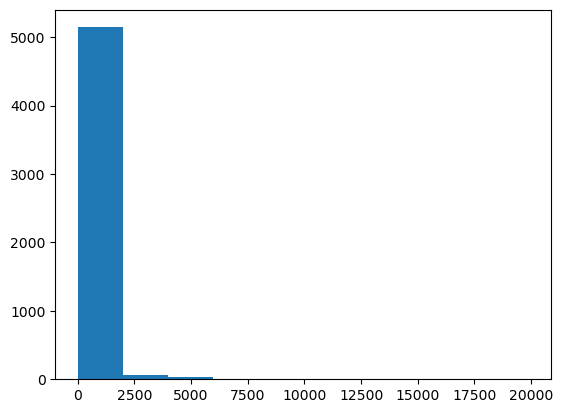

In [193]:
# Display distribution of the number of original tweets
df['num_original_tweets'] = (df['total_tweets'] * df['per_orig']).round(2)
# create a figure with a single plot.
fig, ax = plt.subplots()

ax.hist(df['num_original_tweets'])

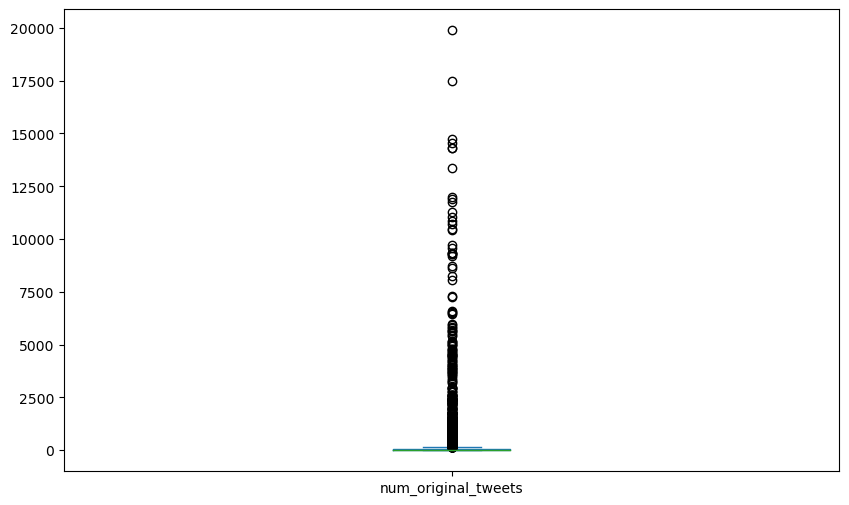

In [194]:
df['num_original_tweets'].plot(
    kind='box',  
    figsize=(10, 6)
)

plt.show()

In [195]:
small_tweets = df[df['num_original_tweets'] < 10]
small_tweets['num_original_tweets'].value_counts()

0.0    1179
1.0     563
2.0     284
3.0     174
4.0     142
6.0     113
5.0     108
9.0      71
7.0      69
8.0      63
Name: num_original_tweets, dtype: int64

**Explore type of users**

In [196]:
language =  df[df['num_en'] != 'None'].copy()
language['num_en'] = language['num_en'].astype(float)

In [197]:
language['%_english'] = (language['num_en'] / language['total_tweets']).round(4)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

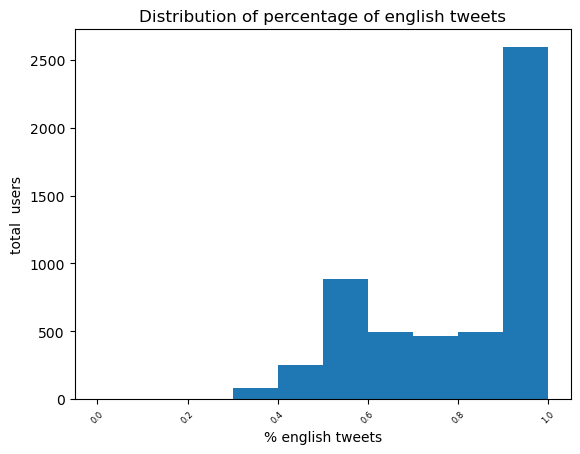

In [198]:
# create a figure with a single plot.
plt.hist(language['%_english'])
plt.title('Distribution of percentage of english tweets')
plt.xlabel('% english tweets', fontsize=10)
plt.ylabel('total  users', fontsize=10)
plt.xticks(rotation = 45, fontsize=6)

## **Data Cleaning**

**Create a binary classification for the dependent variable**

In [199]:
# Create binary classification for expert
def check_if_expert(x):
    if x['utype'] == "expert":
        return 1
    else:
        return 0

In [200]:
df['expert'] = df.apply(lambda x: check_if_expert(x), axis = 1)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281 entries, 0 to 5280
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   userid                         5281 non-null   int64  
 1   utype                          5281 non-null   object 
 2   domain                         5281 non-null   object 
 3   followers                      5281 non-null   float64
 4   friends                        5281 non-null   float64
 5   total_tweets                   5281 non-null   float64
 6   years                          5281 non-null   float64
 7   per_rt                         5281 non-null   float64
 8   chars                          5281 non-null   float64
 9   chars_rt                       5281 non-null   float64
 10  commas                         5281 non-null   float64
 11  commas_rt                      5281 non-null   float64
 12  periods                        5281 non-null   f

0    0.962318
1    0.037682
Name: expert, dtype: float64

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

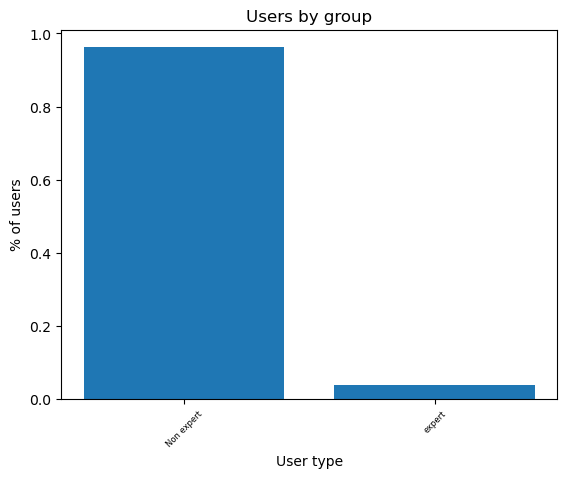

In [202]:
data = df['expert'].value_counts()/df.shape[0]
display(data)
plt.bar(['Non expert', 'expert'], data)
plt.title('Users by group')
plt.xlabel('User type', fontsize=10)
plt.ylabel('% of users', fontsize=10)
plt.xticks(rotation = 45, fontsize=6)

**Remove users who don't have original tweets**

In [203]:
df_cleaned = df[df['per_rt'] != 1].copy()

**Drop unneeded columns**

In [204]:
irrelevant_features = ['utype', 'domain', 'userid','followers', 'friends', 'years']
df_cleaned.drop(labels = irrelevant_features, axis = 1, inplace=True)
df_cleaned.drop(labels = ['total_tweets', 'per_orig', 'num_original_tweets', 'num_en', 'pot_org'], axis = 1, inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4102 entries, 0 to 5280
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   per_rt                         4102 non-null   float64
 1   chars                          4102 non-null   float64
 2   chars_rt                       4102 non-null   float64
 3   commas                         4102 non-null   float64
 4   commas_rt                      4102 non-null   float64
 5   periods                        4102 non-null   float64
 6   periods_rt                     4102 non-null   float64
 7   quesmark                       4102 non-null   float64
 8   quesmark_rt                    4102 non-null   float64
 9   exmark                         4102 non-null   float64
 10  exmark_rt                      4102 non-null   float64
 11  colon                          4102 non-null   float64
 12  colon_rt                       4102 non-null   f

*Remove features relating to retweets*

In [205]:
def extract_retweet_features(cols):
    # pattern = r'\w*rt\w*'
    pattern = r'(rt_\w*|\w*_rt)'
    retweet_cols = [x for x in cols if re.match(pattern, x)]
    return retweet_cols

In [206]:
features_retweet = extract_retweet_features(list(df_cleaned.columns))
features_retweet

['per_rt',
 'chars_rt',
 'commas_rt',
 'periods_rt',
 'quesmark_rt',
 'exmark_rt',
 'colon_rt',
 'semi_rt',
 'punc_rt',
 'tagpermsg_rt',
 'mentpermsg_rt',
 'urlpermsg_rt',
 'percent_msgwithment_rt',
 'percent_msgwithtag_rt',
 'percent_msgwithurl_rt',
 'rt_avg_d',
 'rt_med',
 'rt_avg_d_np',
 'rt_med_np',
 'rt_avg_d_vp',
 'rt_med_vp',
 'pot_rt',
 'glowbe_glowbe_dist_minval_rt',
 'glowbe_glowbe_dist_min3val_rt']

In [207]:
df_cleaned.drop(labels = features_retweet, axis = 1, inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4102 entries, 0 to 5280
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   chars                       4102 non-null   float64
 1   commas                      4102 non-null   float64
 2   periods                     4102 non-null   float64
 3   quesmark                    4102 non-null   float64
 4   exmark                      4102 non-null   float64
 5   colon                       4102 non-null   float64
 6   semi                        4102 non-null   float64
 7   punc                        4102 non-null   float64
 8   tagpermsg                   4102 non-null   float64
 9   mentpermsg                  4102 non-null   float64
 10  urlpermsg                   4102 non-null   float64
 11  percent_msgwithment         4102 non-null   float64
 12  percent_msgwithtag          4102 non-null   float64
 13  percent_msgwithurl          4102 

**Deal with Missing Data**

*Identify nulls*

In [208]:
# Identify nulls
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4102 entries, 0 to 5280
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   chars                       4102 non-null   float64
 1   commas                      4102 non-null   float64
 2   periods                     4102 non-null   float64
 3   quesmark                    4102 non-null   float64
 4   exmark                      4102 non-null   float64
 5   colon                       4102 non-null   float64
 6   semi                        4102 non-null   float64
 7   punc                        4102 non-null   float64
 8   tagpermsg                   4102 non-null   float64
 9   mentpermsg                  4102 non-null   float64
 10  urlpermsg                   4102 non-null   float64
 11  percent_msgwithment         4102 non-null   float64
 12  percent_msgwithtag          4102 non-null   float64
 13  percent_msgwithurl          4102 

Three nulls in 'topic_coherence_merged'

In [209]:
df_cleaned[df_cleaned.isna().any(axis=1)]

chars    commas   periods  quesmark    exmark     colon      semi  \
1543  119.400000  0.600000  2.200000  0.400000  0.400000  0.800000  0.400000   
4937  112.637931  0.344828  1.206897  0.034483  0.103448  1.724138  0.344828   
5260  131.800000  0.200000  1.400000  0.000000  1.000000  1.000000  0.200000   

          punc  tagpermsg  mentpermsg  urlpermsg  percent_msgwithment  \
1543  4.800000   0.600000    0.400000        0.6             0.200000   
4937  3.758621   2.327586    0.448276        1.0             0.310345   
5260  3.800000   0.600000    0.400000        1.0             0.400000   

      percent_msgwithtag  percent_msgwithurl first verb_phrase noun_phrase  \
1543            0.600000                 0.6     0           0           0   
4937            0.844828                 1.0     0           0           0   
5260            0.400000                 1.0     0           0           0   

     interj stopwords slang sentiment entity active_vb modal_vb negative_vb  \
1543      0         0     0         0      0         0        0           0   
4937      0         0     0         0      0         0        0           0   
5260      0         0     0         0      0         0        0           0   

     dt org_avg_d   org_med  org_avg_d_np  org_med_np  org_avg_d_vp  \
1543  0         8  4.800000           6.0    7.200000           7.0   
4937  0         6  2.965517           3.0    5.040816           4.5   
5260  0         7  5.400000           5.0    6.000000           5.0   

      org_med_vp        lexco glowbe_glowbe_dist_minval  \
1543    1.000000  0.502514426               0.326206444   
4937    0.982759  0.401054847               0.236357943   
5260    1.000000   0.35638227               0.266123025   

     glowbe_glowbe_dist_min3val glowbe_us_count_minval  \
1543                0.476288122             609.333333   
4937                0.354721308               2.333333   
5260                0.344187812              56.666667   

     glowbe_us_count_min3val topic_coherence_merged  expert  
1543                0.040382                    NaN       0  
4937                0.072737                    NaN       0  
5260                0.023626                    NaN       0

In [210]:
stylistic_zeros = df_cleaned[(df_cleaned['first'] == '0') 
& (df_cleaned['verb_phrase'] == '0') 
& (df_cleaned['noun_phrase'] == '0')
& (df_cleaned['interj'] == '0')
& (df_cleaned['stopwords'] == '0')
& (df_cleaned['slang'] == '0')
& (df_cleaned['sentiment'] == '0')
& (df_cleaned['entity'] == '0') 
& (df_cleaned['active_vb'] == '0')
& (df_cleaned['modal_vb'] == '0')
& (df_cleaned['negative_vb'] == '0')
& (df_cleaned['dt'] == '0')]
stylistic_zeros

chars    commas   periods  quesmark    exmark     colon      semi  \
930    22.000000  0.000000  1.000000  0.000000  0.000000  1.000000  0.000000   
1543  119.400000  0.600000  2.200000  0.400000  0.400000  0.800000  0.400000   
1793   59.000000  0.000000  1.000000  0.000000  0.000000  1.000000  0.000000   
2944   59.250000  0.000000  1.000000  0.000000  0.000000  1.000000  0.000000   
3375   37.000000  0.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
4119   59.250000  0.000000  1.000000  0.000000  0.000000  1.000000  0.000000   
4729   22.000000  0.000000  1.000000  0.000000  0.000000  1.000000  0.000000   
4855   22.000000  0.000000  1.000000  0.000000  0.000000  1.000000  0.000000   
4937  112.637931  0.344828  1.206897  0.034483  0.103448  1.724138  0.344828   
5260  131.800000  0.200000  1.400000  0.000000  1.000000  1.000000  0.200000   

          punc  tagpermsg  mentpermsg  urlpermsg  percent_msgwithment  \
930   2.000000   0.000000    0.000000        0.0             0.000000   
1543  4.800000   0.600000    0.400000        0.6             0.200000   
1793  2.000000   0.000000    0.000000        1.0             0.000000   
2944  2.000000   0.750000    0.000000        1.0             0.000000   
3375  2.000000   0.000000    2.000000        0.0             1.000000   
4119  2.000000   0.750000    0.000000        1.0             0.000000   
4729  2.000000   0.000000    0.000000        1.0             0.000000   
4855  2.000000   0.000000    0.000000        1.0             0.000000   
4937  3.758621   2.327586    0.448276        1.0             0.310345   
5260  3.800000   0.600000    0.400000        1.0             0.400000   

      percent_msgwithtag  percent_msgwithurl first verb_phrase noun_phrase  \
930             0.000000                 0.0     0           0           0   
1543            0.600000                 0.6     0           0           0   
1793            0.000000                 1.0     0           0           0   
2944            0.500000                 1.0     0           0           0   
3375            0.000000                 0.0     0           0           0   
4119            0.500000                 1.0     0           0           0   
4729            0.000000                 1.0     0           0           0   
4855            0.000000                 1.0     0           0           0   
4937            0.844828                 1.0     0           0           0   
5260            0.400000                 1.0     0           0           0   

     interj stopwords slang sentiment entity active_vb modal_vb negative_vb  \
930       0         0     0         0      0         0        0           0   
1543      0         0     0         0      0         0        0           0   
1793      0         0     0         0      0         0        0           0   
2944      0         0     0         0      0         0        0           0   
3375      0         0     0         0      0         0        0           0   
4119      0         0     0         0      0         0        0           0   
4729      0         0     0         0      0         0        0           0   
4855      0         0     0         0      0         0        0           0   
4937      0         0     0         0      0         0        0           0   
5260      0         0     0         0      0         0        0           0   

     dt org_avg_d   org_med  org_avg_d_np  org_med_np  org_avg_d_vp  \
930   0         0  0.000000           0.0    0.000000           0.0   
1543  0         8  4.800000           6.0    7.200000           7.0   
1793  0         2  2.000000           2.0    2.000000           0.0   
2944  0         2  2.000000           2.0    2.000000           0.0   
3375  0         4  4.000000           2.0    2.000000           3.0   
4119  0         2  2.000000           2.0    2.000000           0.0   
4729  0         0  0.000000           0.0    0.000000           0.0   
4855  0         0  0.000000  

In [211]:
stylistic_zeros['expert'].count()

10

In [212]:
df_cleaned[df_cleaned['glowbe_us_count_min3val'] != 'None']

chars    commas   periods  quesmark    exmark     colon      semi  \
5     119.250000  0.375000  1.625000  0.062500  0.062500  0.875000  0.000000   
7      87.666667  0.666667  1.333333  0.000000  0.333333  0.333333  0.000000   
10    126.333333  0.000000  0.333333  0.000000  0.000000  0.333333  0.000000   
12    131.333333  0.000000  1.666667  0.333333  0.000000  1.333333  0.000000   
20     59.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
5266  135.000000  0.000000  1.500000  0.000000  0.500000  2.000000  0.000000   
5271  136.000000  0.000000  2.500000  0.000000  0.000000  3.000000  0.000000   
5274  129.250000  0.145161  3.088710  0.016129  0.000000  3.104839  0.000000   
5275   92.625000  0.000000  1.500000  0.000000  0.375000  0.500000  0.000000   
5276  108.666667  0.000000  1.000000  0.000000  0.000000  1.000000  0.333333   

          punc  tagpermsg  mentpermsg  urlpermsg  percent_msgwithment  \
5     3.000000   0.687500    0.812500   0.500000             0.500000   
7     2.666667   1.333333    1.000000   0.000000             0.333333   
10    0.666667   8.000000    0.000000   0.000000             0.000000   
12    3.333333   0.666667    0.333333   1.000000             0.333333   
20    0.000000   0.000000    1.000000   0.000000             1.000000   
...        ...        ...         ...        ...                  ...   
5266  4.000000   2.000000    0.500000   1.500000             0.500000   
5271  5.500000   0.000000    0.000000   2.500000             0.000000   
5274  6.354839   2.387097    0.000000   0.983871             0.000000   
5275  2.375000   0.375000    0.500000   0.000000             0.375000   
5276  2.333333   0.000000    2.333333   1.000000             1.000000   

      percent_msgwithtag  percent_msgwithurl        first  verb_phrase  \
5               0.437500            0.500000  0.133333333          2.2   
7               0.666667            0.000000          0.6  1.066666667   
10              1.000000            0.000000  0.333333333  1.666666667   
12              0.666667            1.000000  0.333333333  3.333333333   
20              0.000000            0.000000            0            1   
...                  ...                 ...          ...          ...   
5266            1.000000            1.000000  0.666666667  1.666666667   
5271            0.000000            1.000000  0.333333333            1   
5274            1.000000            0.983871            0  0.057971014   
5275            0.250000            0.000000  0.454545455  2.454545455   
5276            0.000000            1.000000          0.5        1.125   

      noun_phrase       interj    stopwords        slang    sentiment  \
5     5.333333333  0.133333333          4.4  0.533333333            1   
7     3.866666667          0.4  2.733333333            1  0.333333333   
10            3.5            0  0.666666667  0.166666667  0.666666667   
12    7.666666667            0  5.666666667  0.333333333            1   
20              3            1            5            1            2   
...           ...          ...          ...          ...          ...   
5266  6.333333333  0.333333333  4.666666667  1.666666667            0   
5271            5            0  2.333333333            1  0.666666667   
5274  2.463768116  0.231884058            0  0.028985507            0   
5275  4.909090909  0.181818182  5.545454545  1.272727273  0.545454545   
5276         4.25          0.5            3         0.75        0.125   

           entity    active_vb     modal_vb  negative_vb           dt  \
5             0.6  0.733333333  0.266666667  1.533333333  0.933333333   
7     0.466666667  0.066666667          0.2  0.666666667  0.733333333   
10              0  0.166666667            0            0            0   
12    1.333333333  0.333333333            0            2  0.666666667   
20              1            0            

In [213]:
df_cleaned.shape

(4102, 39)

In [214]:
# Drop rows which have null values
df_cleaned.dropna(axis = 0, how = 'any', inplace = True)
df_cleaned.shape

(4099, 39)

*Identify Nones*

In [215]:
# Identify where there is missing data
categorical_variables = list(df_cleaned.columns[df_cleaned.dtypes == 'object'])
for var in categorical_variables:
    num_zeros = df_cleaned[df_cleaned[var] == '0'][var].count()
    num_nones = df_cleaned[df_cleaned[var] == 'None'][var].count()
    print(f'{var}: Num zeros: {num_zeros}, num nones: {num_nones}')

first: Num zeros: 847, num nones: 3
verb_phrase: Num zeros: 247, num nones: 3
noun_phrase: Num zeros: 34, num nones: 3
interj: Num zeros: 1179, num nones: 3
stopwords: Num zeros: 241, num nones: 3
slang: Num zeros: 421, num nones: 3
sentiment: Num zeros: 952, num nones: 3
entity: Num zeros: 631, num nones: 3
active_vb: Num zeros: 916, num nones: 3
modal_vb: Num zeros: 786, num nones: 3
negative_vb: Num zeros: 463, num nones: 3
dt: Num zeros: 516, num nones: 3
org_avg_d: Num zeros: 60, num nones: 3
lexco: Num zeros: 925, num nones: 0
glowbe_glowbe_dist_minval: Num zeros: 0, num nones: 475
glowbe_glowbe_dist_min3val: Num zeros: 0, num nones: 475
glowbe_us_count_minval: Num zeros: 0, num nones: 2079
glowbe_us_count_min3val: Num zeros: 0, num nones: 2081
topic_coherence_merged: Num zeros: 0, num nones: 1439


In [216]:
# Inspect missing data in stylistic  to see if it is missing at random
df_cleaned[df_cleaned['first']== 'None']

chars    commas   periods  quesmark    exmark     colon      semi  \
203   108.978610  0.240642  1.315508  0.000000  0.593583  2.398396  0.056150   
3080   92.236527  0.263473  1.149701  0.011976  0.005988  1.428144  0.155689   
4893  114.203338  0.215478  1.135053  0.077390  0.024279  0.811836  0.028832   

          punc  tagpermsg  mentpermsg  urlpermsg  percent_msgwithment  \
203   4.604278   2.355615    0.000000   0.938503             0.000000   
3080  3.014970   1.002994    0.000000   1.000000             0.000000   
4893  2.292868   1.972686    0.986343   0.745068             0.742033   

      percent_msgwithtag  percent_msgwithurl first verb_phrase noun_phrase  \
203             0.639037            0.938503  None        None        None   
3080            1.000000            1.000000  None        None        None   
4893            0.930197            0.742033  None        None        None   

     interj stopwords slang sentiment entity active_vb modal_vb negative_vb  \
203    None      None  None      None   None      None     None        None   
3080   None      None  None      None   None      None     None        None   
4893   None      None  None      None   None      None     None        None   

        dt org_avg_d   org_med  org_avg_d_np  org_med_np  org_avg_d_vp  \
203   None      None  3.503788           3.0    2.579767           2.0   
3080  None      None  5.314371           5.0    2.760479           2.0   
4893  None      None  6.593323           6.0    3.299539           2.0   

      org_med_vp        lexco glowbe_glowbe_dist_minval  \
203     3.451923            0                0.31657095   
3080    4.828000            1               0.252439443   
4893    5.506711  0.857142857                 0.2558752   

     glowbe_glowbe_dist_min3val glowbe_us_count_minval  \
203                 0.453185832                   None   
3080                0.393504925               1.63E-05   
4893                0.445786042            0.000645212   

     glowbe_us_count_min3val topic_coherence_merged  expert  
203                     None                   None       0  
3080                    None                   None       0  
4893                    None                   None       0

In [217]:
df_cleaned.shape

(4099, 39)

In [218]:
# Remove rows with missing data
indicies = list(df_cleaned[df_cleaned['first']== 'None'].index)
df_cleaned.drop(labels=indicies, axis=0, inplace=True)
df_cleaned.shape

(4096, 39)

In [219]:
# Inspect missing data in linguistic features

In [220]:
df_cleaned[df_cleaned['topic_coherence_merged'] == 'None']

chars    commas   periods  quesmark    exmark     colon      semi  \
2      61.200000  0.000000  1.000000  0.000000  0.000000  1.000000  0.000000   
16    102.718194  0.249674  1.102041  0.017803  0.004776  1.267043  0.105515   
20     59.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21    109.463415  0.211382  1.252033  0.113821  0.105691  1.024390  0.024390   
27     77.000000  0.000000  1.000000  1.500000  0.000000  0.500000  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
5267  109.622222  0.400000  0.955556  0.244444  0.888889  0.844444  0.177778   
5272   75.000000  0.000000  0.750000  0.000000  0.000000  0.750000  0.000000   
5274  129.250000  0.145161  3.088710  0.016129  0.000000  3.104839  0.000000   
5277  114.548094  0.208406  3.100953  0.044627  0.379549  1.081023  0.033795   
5278   51.000000  0.000000  1.000000  0.000000  0.000000  1.000000  0.000000   

          punc  tagpermsg  mentpermsg  urlpermsg  percent_msgwithment  \
2     2.000000   1.000000    0.000000   1.000000             0.000000   
16    2.746852   0.875814    0.000000   1.045593             0.000000   
20    0.000000   0.000000    1.000000   0.000000             1.000000   
21    2.731707   2.666667    0.138211   0.926829             0.130081   
27    3.000000   4.000000    1.000000   0.500000             0.500000   
...        ...        ...         ...        ...                  ...   
5267  3.511111   1.377778    1.355556   0.244444             0.733333   
5272  1.500000   0.000000    1.750000   0.750000             1.000000   
5274  6.354839   2.387097    0.000000   0.983871             0.000000   
5277  4.848354   4.339255    0.098787   0.003899             0.068458   
5278  2.000000   2.000000    0.000000   1.000000             0.000000   

      percent_msgwithtag  percent_msgwithurl        first  verb_phrase  \
2               0.600000            1.000000            0            0   
16              0.875814            1.000000  0.264975951  1.054656756   
20              0.000000            0.000000            0            1   
21              0.943089            0.918699  0.279661017  1.398305085   
27              0.500000            0.500000  0.020833333  0.166666667   
...                  ...                 ...          ...          ...   
5267            0.777778            0.244444  0.137931034  0.517241379   
5272            0.000000            0.750000  0.231481481  0.990740741   
5274            1.000000            0.983871            0  0.057971014   
5277            0.715771            0.003899   0.48318872  0.327006508   
5278            1.000000            1.000000            0            0   

      noun_phrase       interj    stopwords        slang    sentiment  \
2     0.333333333            0            0            0            0   
16    3.680367293  0.013992129  1.737210319  0.381285527  0.177087888   
20              3            1            5            1            2   
21     3.63559322  0.008474576  3.211864407  0.720338983  0.305084746   
27           1.75  0.083333333  0.229166667       0.0625  0.052083333   
...           ...          ...          ...          ...          ...   
5267  2.827586207  2.034482759            0  0.689655172            0   
5272  3.759259259  0.305555556  1.768518519  0.388888889  0.138888889   
5274  2.463768116  0.231884058            0  0.028985507            0   
5277  1.909978308  1.878524946  0.296095445   0.67462039  0.039587852   
5278            2            0            0            0            0   

           entity    active_vb     modal_vb  negative_vb           dt  \
2               0            0            0            0            0   
16    1.734149541  0.120682116  0.110188019   0.43025798  0.299519021   
20              1            0            2            2            3   
21    0.313559322   0.36440678  0.398305085  0.847457627  0.881355932   
27        0.15625  0.041666667  0.01041666

In [221]:
# Replace none with 0
df_cleaned.replace(to_replace=['None'], value=0, inplace=True)

In [222]:
categorical_variables = list(df_cleaned.columns[df_cleaned.dtypes == 'object'])
categorical_variables

['first',
 'verb_phrase',
 'noun_phrase',
 'interj',
 'stopwords',
 'slang',
 'sentiment',
 'entity',
 'active_vb',
 'modal_vb',
 'negative_vb',
 'dt',
 'org_avg_d',
 'lexco',
 'glowbe_glowbe_dist_minval',
 'glowbe_glowbe_dist_min3val',
 'glowbe_us_count_minval',
 'glowbe_us_count_min3val',
 'topic_coherence_merged']

In [223]:
for column in categorical_variables:
    df_cleaned[column] = df_cleaned[column].astype(float)

In [224]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4096 entries, 0 to 5280
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   chars                       4096 non-null   float64
 1   commas                      4096 non-null   float64
 2   periods                     4096 non-null   float64
 3   quesmark                    4096 non-null   float64
 4   exmark                      4096 non-null   float64
 5   colon                       4096 non-null   float64
 6   semi                        4096 non-null   float64
 7   punc                        4096 non-null   float64
 8   tagpermsg                   4096 non-null   float64
 9   mentpermsg                  4096 non-null   float64
 10  urlpermsg                   4096 non-null   float64
 11  percent_msgwithment         4096 non-null   float64
 12  percent_msgwithtag          4096 non-null   float64
 13  percent_msgwithurl          4096 

In [225]:
df_cleaned.reset_index(inplace = True)
df_cleaned

index       chars    commas   periods  quesmark    exmark     colon  \
0         0   77.285714  0.285714  1.571429  0.000000  0.000000  1.142857   
1         2   61.200000  0.000000  1.000000  0.000000  0.000000  1.000000   
2         5  119.250000  0.375000  1.625000  0.062500  0.062500  0.875000   
3         7   87.666667  0.666667  1.333333  0.000000  0.333333  0.333333   
4         8  107.077922  0.064935  1.694805  0.233766  0.240260  1.162338   
...     ...         ...       ...       ...       ...       ...       ...   
4091   5276  108.666667  0.000000  1.000000  0.000000  0.000000  1.000000   
4092   5277  114.548094  0.208406  3.100953  0.044627  0.379549  1.081023   
4093   5278   51.000000  0.000000  1.000000  0.000000  0.000000  1.000000   
4094   5279  101.789474  0.263158  1.947368  0.473684  0.473684  0.894737   
4095   5280   64.301444  0.056859  0.395307  0.216606  0.360108  0.209386   

          semi      punc  tagpermsg  mentpermsg  urlpermsg  \
0     0.000000  3.000000   0.000000    1.000000   0.428571   
1     0.000000  2.000000   1.000000    0.000000   1.000000   
2     0.000000  3.000000   0.687500    0.812500   0.500000   
3     0.000000  2.666667   1.333333    1.000000   0.000000   
4     0.103896  3.500000   1.603896    0.928571   1.051948   
...        ...       ...        ...         ...        ...   
4091  0.333333  2.333333   0.000000    2.333333   1.000000   
4092  0.033795  4.848354   4.339255    0.098787   0.003899   
4093  0.000000  2.000000   2.000000    0.000000   1.000000   
4094  0.368421  4.421053   0.000000    0.894737   0.473684   
4095  0.017148  1.255415   0.022563    1.161552   0.017148   

      percent_msgwithment  percent_msgwithtag  percent_msgwithurl     first  \
0                0.571429            0.000000            0.428571  0.086957   
1                0.000000            0.600000            1.000000  0.000000   
2                0.500000            0.437500            0.500000  0.133333   
3                0.333333            0.666667            0.000000  0.600000   
4                0.597403            0.688312            0.915584  0.209302   
...                   ...                 ...                 ...       ...   
4091             1.000000            0.000000            1.000000  0.500000   
4092             0.068458            0.715771            0.003899  0.483189   
4093             0.000000            1.000000            1.000000  0.000000   
4094             0.631579            0.000000            0.473684  0.444444   
4095             0.781588            0.018953            0.016245  0.401662   

      verb_phrase  noun_phrase    interj  stopwords     slang  sentiment  \
0        0.652174     2.695652  1.000000   0.695652  0.260870   0.043478   
1        0.000000     0.333333  0.000000   0.000000  0.000000   0.000000   
2        2.200000     5.333333  0.133333   4.400000  0.533333   1.000000   
3        1.066667     3.866667  0.400000   2.733333  1.000000   0.333333   
4        1.286822     3.565891  0.147287   2.922481  0.899225   0.209302   
...           ...          ...       ...        ...       ...        ...   
4091     1.125000     4.250000  0.500000   3.000000  0.750000   0.125000   
4092     0.327007     1.909978  1.878525   0.296095  0.674620   0.039588   
4093     0.000000     2.000000  0.000000   0.000000  0.000000   0.000000   
4094     1.944444     4.444444  1.666667   3.388889  1.777778   0.166667   
4095     1.666667     3.280702  0.701754   3.291782  0.825485   0.516159   

        entity  active_vb  modal_vb  negative_vb        dt  org_avg_d  \
0     0.478261   0.217391  0.086957     0.217391  0.173913   3.428571   
1     0.000000   0.000000  0.000000     0.000000  0.000000   2.000000   
2     0.600000   0.733333  0.266667     1.533333  0.933333   8.437500   
3     0.466667   0.066667  0.200000     0.666667  0.733333   4.333333   
4     0.372093   0.271318  0.511628     0.891473  1.046512   5.948052   
...        ...        ...       ... 

## **Train / Test Split**
Output is: Train, Test

In [226]:
from sklearn.model_selection import train_test_split

y = df_cleaned['expert']
X = df_cleaned.drop(columns=['expert', 'index'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=76, stratify = y)

print('Distribution of train classes:')
display(pd.Series(y_train).value_counts())

Distribution of train classes:


0    3125
1     151
Name: expert, dtype: int64

## **Data Exploration**

### **Outlier Analysis**

In [227]:
# boxplots of all stylistic features, showing classified potential outliers

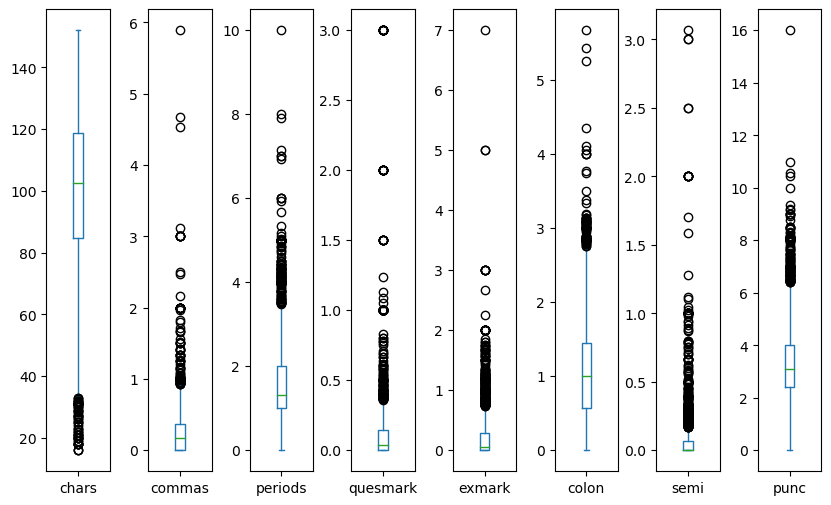

In [228]:
X_train.iloc[:,0:8].plot(
    kind='box', 
    subplots= True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=.6) 

plt.show()

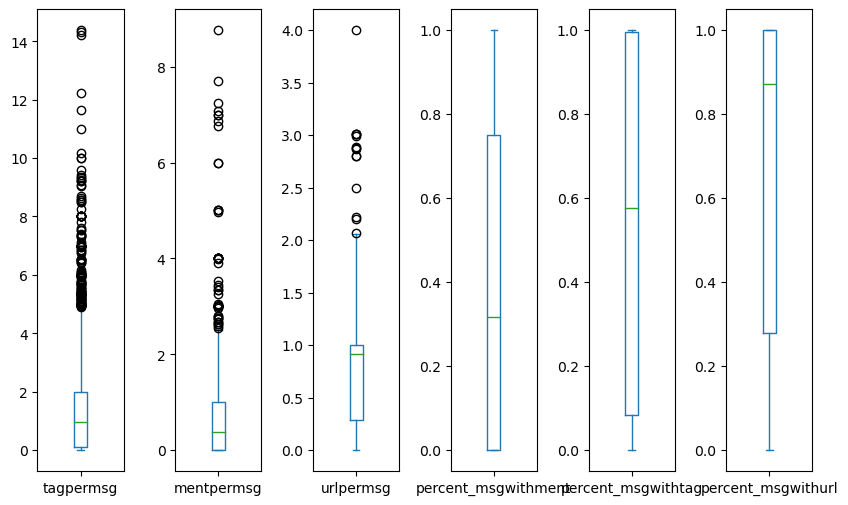

In [229]:
X_train.iloc[:,8:14].plot(
    kind='box', 
    subplots= True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=.6) 

plt.show()

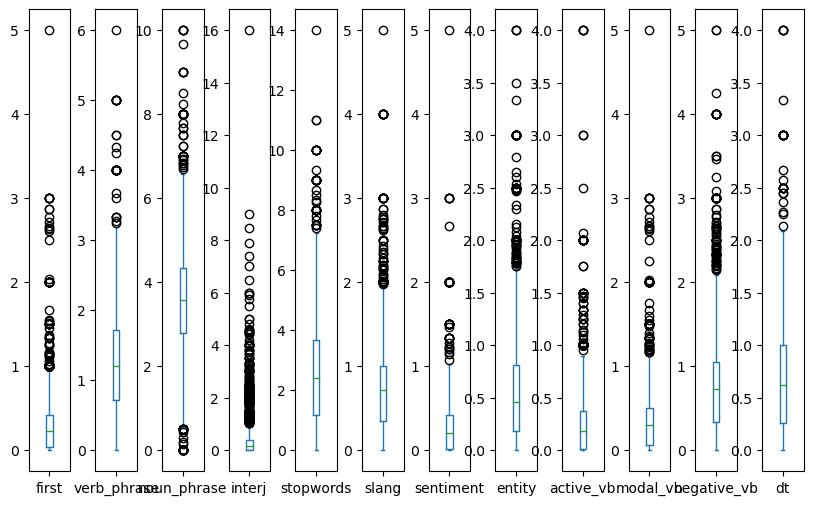

In [230]:
X_train.iloc[:,14:26].plot(
    kind='box', 
    subplots= True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=.6) 

plt.show()

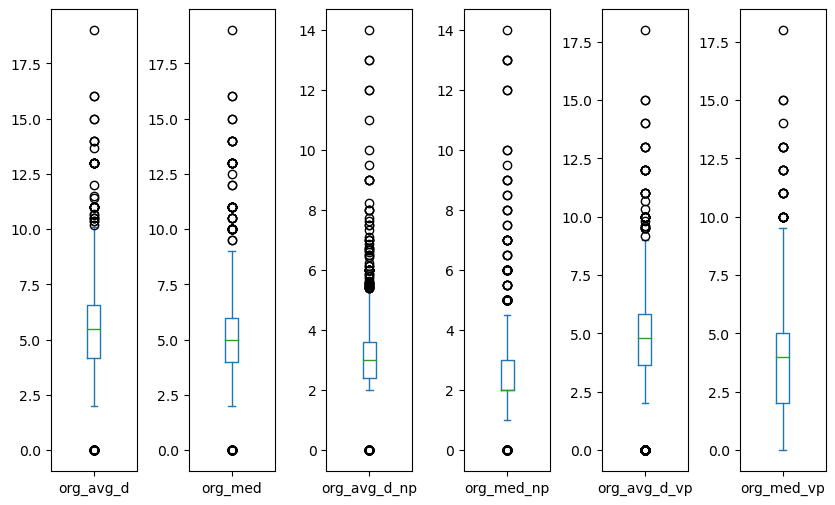

In [231]:
X_train.iloc[:,26:32].plot(
    kind='box', 
    subplots= True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=.6) 

plt.show()

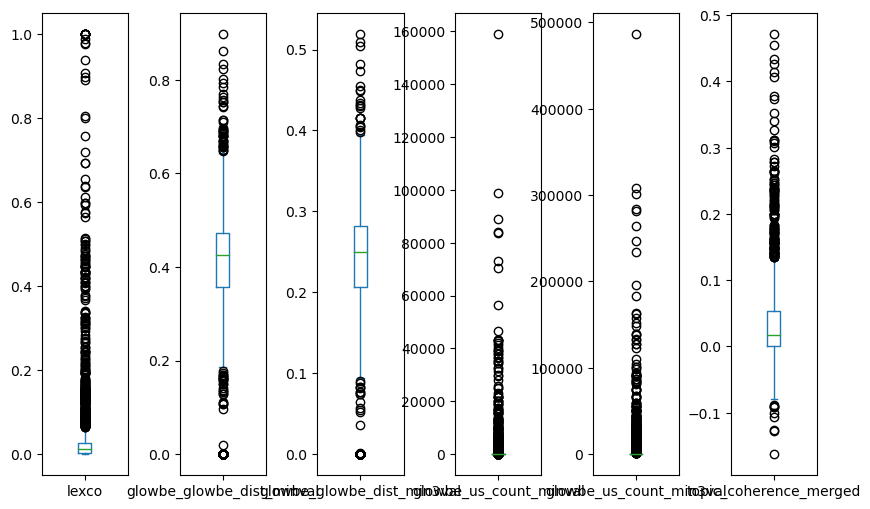

In [232]:
X_train.iloc[:,32:].plot(
    kind='box', 
    subplots= True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=.6) 

plt.show()

In [233]:
# decision to keep outliers, as they may represent experts, and some of them have extremely skewed
# distributions with almost half of the dataset classified as outliers 

## **Feature Selection**

### ***Technique 1 - Feature Filtering***


In [234]:
columns = list(X_train.columns)
columns

['chars',
 'commas',
 'periods',
 'quesmark',
 'exmark',
 'colon',
 'semi',
 'punc',
 'tagpermsg',
 'mentpermsg',
 'urlpermsg',
 'percent_msgwithment',
 'percent_msgwithtag',
 'percent_msgwithurl',
 'first',
 'verb_phrase',
 'noun_phrase',
 'interj',
 'stopwords',
 'slang',
 'sentiment',
 'entity',
 'active_vb',
 'modal_vb',
 'negative_vb',
 'dt',
 'org_avg_d',
 'org_med',
 'org_avg_d_np',
 'org_med_np',
 'org_avg_d_vp',
 'org_med_vp',
 'lexco',
 'glowbe_glowbe_dist_minval',
 'glowbe_glowbe_dist_min3val',
 'glowbe_us_count_minval',
 'glowbe_us_count_min3val',
 'topic_coherence_merged']

In [235]:
behavioural = ['tagpermsg','mentpermsg','urlpermsg','percent_msgwithment','percent_msgwithtag','percent_msgwithurl']
stylistic = ['chars','commas','periods','quesmark','exmark','colon','semi','punc',
'first','verb_phrase','noun_phrase','interj','stopwords', 'slang',
 'sentiment','entity','active_vb','modal_vb','negative_vb','dt']
linguistic = ['org_avg_d','org_med','org_avg_d_np','org_med_np','org_avg_d_vp','org_med_vp',
 'lexco','glowbe_glowbe_dist_minval','glowbe_glowbe_dist_min3val','glowbe_us_count_minval','glowbe_us_count_min3val',
 'topic_coherence_merged']

**Correlation Analysis**

No no need to standardize before removing highly correlated features because the correlation coefficient is independent of change of origin and scale. Therefore standardization will not alter the value of the correlation.

In [236]:
def correlation(data):
    '''Creates a correlation matrix between all features and removes those with a correlation 
    greater than the specified threshold.'''

    # pearson's correlation for identifying and removing highly-correlated features
    correlation_matrix = data.corr(method='pearson')
    display(pd.DataFrame(correlation_matrix))

    correlated_features = []
    # set threshold to 70% correlation
    THRESHOLD = 0.7

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > THRESHOLD:
                # add feature to remove list
                colname = correlation_matrix.columns[i]
                correlated_features.append(colname)

    # remove duplicates in the list
    correlated_features = list(dict.fromkeys(correlated_features))


    return correlated_features


In [237]:
# Identify highly correlated features from the behavioural features
correlated_features_behavioural = correlation(X_train[behavioural])
correlated_features_behavioural

tagpermsg  mentpermsg  urlpermsg  percent_msgwithment  \
tagpermsg             1.000000   -0.296745   0.289794            -0.378247   
mentpermsg           -0.296745    1.000000  -0.372334             0.792839   
urlpermsg             0.289794   -0.372334   1.000000            -0.446299   
percent_msgwithment  -0.378247    0.792839  -0.446299             1.000000   
percent_msgwithtag    0.690351   -0.302057   0.369402            -0.400818   
percent_msgwithurl    0.311581   -0.404612   0.883238            -0.493833   

                     percent_msgwithtag  percent_msgwithurl  
tagpermsg                      0.690351            0.311581  
mentpermsg                    -0.302057           -0.404612  
urlpermsg                      0.369402            0.883238  
percent_msgwithment           -0.400818           -0.493833  
percent_msgwithtag             1.000000            0.405891  
percent_msgwithurl             0.405891            1.000000

['percent_msgwithment', 'percent_msgwithurl']

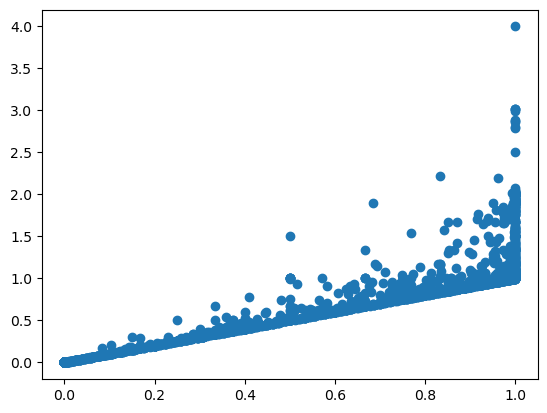

In [238]:
# top correlated pair in behavioural group
plt.scatter(X_train['percent_msgwithurl'], X_train['urlpermsg'])

In [239]:
# Identify highly correlated features from the stylistic features
correlated_features_stylistic = correlation(X_train[stylistic])
correlated_features_stylistic

chars    commas   periods  quesmark    exmark     colon  \
chars        1.000000  0.219830  0.484856 -0.086967 -0.005744  0.527039   
commas       0.219830  1.000000  0.115441 -0.046941 -0.030768  0.063263   
periods      0.484856  0.115441  1.000000 -0.134078 -0.124867  0.490457   
quesmark    -0.086967 -0.046941 -0.134078  1.000000 -0.026513 -0.177139   
exmark      -0.005744 -0.030768 -0.124867 -0.026513  1.000000 -0.105158   
colon        0.527039  0.063263  0.490457 -0.177139 -0.105158  1.000000   
semi         0.189505  0.086702  0.011545 -0.018510  0.043593  0.021302   
punc         0.610508  0.331595  0.832948  0.003736  0.120392  0.730482   
first        0.177257  0.095070  0.093840 -0.010937  0.043249 -0.039434   
verb_phrase  0.232463  0.174827  0.037327  0.068641  0.130955 -0.205769   
noun_phrase  0.494286  0.357642  0.244777 -0.000665  0.055993  0.043316   
interj      -0.090273  0.054465 -0.049140 -0.012356  0.072455 -0.046076   
stopwords    0.219587  0.197861  0.005375  0.076443  0.118739 -0.235711   
slang        0.173243  0.108479 -0.016664  0.135641  0.373213 -0.144955   
sentiment    0.049844  0.130764 -0.012776  0.005737  0.150981 -0.197262   
entity       0.241331  0.138295  0.167573 -0.096773 -0.094110  0.210245   
active_vb    0.071658  0.128111 -0.036626  0.130049  0.063212 -0.212370   
modal_vb     0.183044  0.131729  0.074068  0.032015  0.026035 -0.095398   
negative_vb  0.212156  0.184597  0.042987  0.018169  0.043030 -0.141800   
dt           0.196557  0.157631  0.054617  0.060335  0.101135 -0.136042   

                 semi      punc     first  verb_phrase  noun_phrase    interj  \
chars        0.189505  0.610508  0.177257     0.232463     0.494286 -0.090273   
commas       0.086702  0.331595  0.095070     0.174827     0.357642  0.054465   
periods      0.011545  0.832948  0.093840     0.037327     0.244777 -0.049140   
quesmark    -0.018510  0.003736 -0.010937     0.068641    -0.000665 -0.012356   
exmark       0.043593  0.120392  0.043249     0.130955     0.055993  0.072455   
colon        0.021302  0.730482 -0.039434    -0.205769     0.043316 -0.046076   
semi         1.000000  0.180736  0.075423     0.093034     0.143786  0.024744   
punc         0.180736  1.000000  0.082813     0.028684     0.292859 -0.020299   
first        0.075423  0.082813  1.000000     0.231046     0.321856  0.121088   
verb_phrase  0.093034  0.028684  0.231046     1.000000     0.681442 -0.144879   
noun_phrase  0.143786  0.292859  0.321856     0.681442     1.000000 -0.143497   
interj       0.024744 -0.020299  0.121088    -0.144879    -0.143497  1.000000   
stopwords    0.068162 -0.005045  0.257058     0.832773     0.729498 -0.161763   
slang        0.076186  0.079135  0.574446     0.458693     0.433833  0.108991   
sentiment    0.084925 -0.017543  0.122386     0.482162     0.373343 -0.031307   
entity       0.026825  0.197116  0.023330    -0.041295     0.284370 -0.113151   
active_vb    0.023529 -0.047232  0.202483     0.631719     0.444046 -0.034250   
modal_vb     0.061097  0.054864  0.465272     0.399265     0.392545  0.068667   
negative_vb  0.037716  0.024576  0.536900     0.462148     0.476187  0.204787   
dt           0.053397  0.053286  0.153739     0.594856     0.555218 -0.100909   

             stopwords     slang  sentiment    entity  active_vb  modal_vb  \
chars         0.219587  0.173243   0.049844  0.241331   0.071658  0.183044   
commas        0.197861  0.108479   0.130764  0.138295   0.128111  0.131729   
periods       0.005375 -0.016664  -0.012776  0.167573  -0.036626  0.074068   
quesmark      0.076443  0.135641   0.005737 -0.096773   0.130049  0.032015   
exmark        0.118739  0.373213   0.150981 -0.094110   0.063212  0.026035   
colon        -0.235711 -0.144955  -0.197262  0.210245  -0.212370 -0.095398   
semi          0.068162  0.076186   0.084925  0.026825   0.023529  0.061097   
punc         -0.005045  0.079135  -0.017543  0.197116  -0.047232  0.054864   
first         0.257058  0.574446   0

['punc', 'stopwords', 'dt']

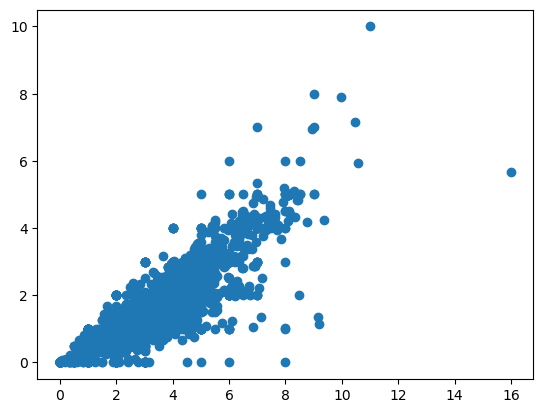

In [240]:
# top correlated pair in stylistic group
plt.scatter(X_train['punc'], X_train['periods'])

In [241]:
# Identify highly correlated features from the linguistic features
correlated_features_linguistic = correlation(X_train[linguistic])
correlated_features_linguistic

org_avg_d   org_med  org_avg_d_np  org_med_np  \
org_avg_d                    1.000000  0.967617      0.730413    0.555438   
org_med                      0.967617  1.000000      0.698335    0.567207   
org_avg_d_np                 0.730413  0.698335      1.000000    0.838539   
org_med_np                   0.555438  0.567207      0.838539    1.000000   
org_avg_d_vp                 0.906052  0.849910      0.629966    0.429667   
org_med_vp                   0.921103  0.927825      0.581801    0.440178   
lexco                       -0.093787 -0.069011     -0.036219    0.037693   
glowbe_glowbe_dist_minval    0.429762  0.382131      0.362577    0.196465   
glowbe_glowbe_dist_min3val   0.444246  0.394255      0.372749    0.203516   
glowbe_us_count_minval       0.054527  0.062850      0.000516    0.027638   
glowbe_us_count_min3val      0.060164  0.070649      0.010658    0.059261   
topic_coherence_merged       0.095017  0.083084      0.096760    0.036536   

                            org_avg_d_vp  org_med_vp     lexco  \
org_avg_d                       0.906052    0.921103 -0.093787   
org_med                         0.849910    0.927825 -0.069011   
org_avg_d_np                    0.629966    0.581801 -0.036219   
org_med_np                      0.429667    0.440178  0.037693   
org_avg_d_vp                    1.000000    0.843894 -0.112032   
org_med_vp                      0.843894    1.000000 -0.077581   
lexco                          -0.112032   -0.077581  1.000000   
glowbe_glowbe_dist_minval       0.491813    0.341223 -0.088136   
glowbe_glowbe_dist_min3val      0.508952    0.353626 -0.095500   
glowbe_us_count_minval          0.039403    0.056082  0.046647   
glowbe_us_count_min3val         0.042496    0.072110  0.076846   
topic_coherence_merged          0.123082    0.061465 -0.021825   

                            glowbe_glowbe_dist_minval  \
org_avg_d                                    0.429762   
org_med                                      0.382131   
org_avg_d_np                                 0.362577   
org_med_np                                   0.196465   
org_avg_d_vp                                 0.491813   
org_med_vp                                   0.341223   
lexco                                       -0.088136   
glowbe_glowbe_dist_minval                    1.000000   
glowbe_glowbe_dist_min3val                   0.989050   
glowbe_us_count_minval                       0.034980   
glowbe_us_count_min3val                      0.020388   
topic_coherence_merged                       0.247662   

                            glowbe_glowbe_dist_min3val  \
org_avg_d                                     0.444246   
org_med                                       0.394255   
org_avg_d_np                                  0.372749   
org_med_np                                    0.203516   
org_avg_d_vp                                  0.508952   
org_med_vp                                    0.353626   
lexco                                        -0.095500   
glowbe_glowbe_dist_minval                     0.989050   
glowbe_glowbe_dist_min3val                    1.000000   
glowbe_us_count_minval                        0.032024   
glowbe_us_count_min3val                       0.012267   
topic_coherence_merged                        0.250560   

                            glowbe_us_count_minval  glowbe_us_count_min3val  \
org_avg_d                                 0.054527                 0.060164   
org_med                                   0.062850                 0.070649   
org_avg_d_np                              0.000516                 0.010658   
org_med_np                                0.027638                 0.059261   
org_avg_d_vp                              0.039403                 0.042496   
org_med_vp                                0.056082                 0.072110   
lexco                                     0.046647                 0.076846   
glowbe_glowbe_dist_minval             

['org_med',
 'org_avg_d_np',
 'org_med_np',
 'org_avg_d_vp',
 'org_med_vp',
 'glowbe_glowbe_dist_min3val']

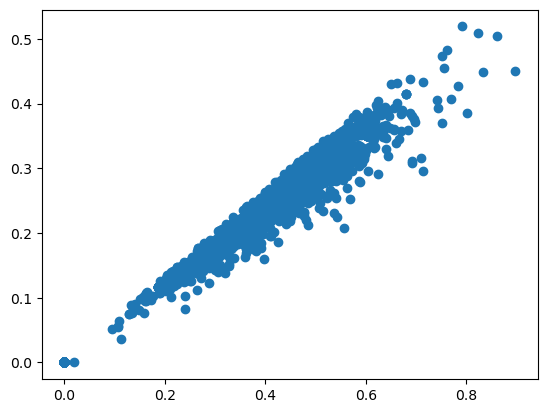

In [242]:
# top correlated pair in stylistic group
plt.scatter(X_train['glowbe_glowbe_dist_minval'], X_train['glowbe_glowbe_dist_min3val'])

In [243]:
# Concatinate all highly correlated features
correlated_features = list(itertools.chain(correlated_features_behavioural, correlated_features_stylistic, correlated_features_linguistic))
correlated_features

['percent_msgwithment',
 'percent_msgwithurl',
 'punc',
 'stopwords',
 'dt',
 'org_med',
 'org_avg_d_np',
 'org_med_np',
 'org_avg_d_vp',
 'org_med_vp',
 'glowbe_glowbe_dist_min3val']

In [244]:
X_train_drop_correlated = X_train.drop(labels=correlated_features, axis=1)
X_train_drop_correlated.columns

Index(['chars', 'commas', 'periods', 'quesmark', 'exmark', 'colon', 'semi',
       'tagpermsg', 'mentpermsg', 'urlpermsg', 'percent_msgwithtag', 'first',
       'verb_phrase', 'noun_phrase', 'interj', 'slang', 'sentiment', 'entity',
       'active_vb', 'modal_vb', 'negative_vb', 'org_avg_d', 'lexco',
       'glowbe_glowbe_dist_minval', 'glowbe_us_count_minval',
       'glowbe_us_count_min3val', 'topic_coherence_merged'],
      dtype='object')

**Feature Selection Using Chi Squared**

Perform binning of continuous data

In [245]:
def binning(data):

    # binning all continuous features into categorical using equal frequency
    for feature in data.columns:
        data[feature] = pd.cut(data[feature], 4, labels=['low','medium low','medium high','high'])

    return data


Perform Chi square analysis

In [246]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [247]:
def filter_features(X, y):
    
    # set significance level
    ALPHA = 0.05

    filtered_features = []
    p_values = []

    for feature in X.columns:

        cont_table = pd.crosstab(y, X[feature])
        chi2_val, p, dof, expected_values = stats.chi2_contingency(cont_table.values, correction=False)
        
        p_values.append(p)

        if(p < ALPHA):
            # should include the feature as it has high correlation with the class label
            filtered_features.append(feature)
    

    return filtered_features, p_values

Feature Selection

In [248]:
# INPUTS: X_train, y_train
# OUTPUTS: X_train only with selected features

def selection(data, y):

    data_binned = data.copy()
    data_binned = binning(data_binned)

    selected_features, p_values = filter_features(data_binned, y)

    return data[selected_features], p_values



In [249]:
X_train_filtered, p_values = selection(X_train_drop_correlated, y_train)
X_train_filtered

chars   periods     colon  tagpermsg  percent_msgwithtag  \
3635   32.500000  0.000000  0.000000   0.000000            0.000000   
3615   99.658537  1.837398  1.593496   2.178862            0.829268   
406    27.000000  0.000000  0.000000   0.000000            0.000000   
2630  125.138973  2.879154  2.879154   3.290030            1.000000   
643    86.000000  1.250000  0.000000   0.000000            0.000000   
...          ...       ...       ...        ...                 ...   
654    96.500000  1.000000  1.333333   1.000000            1.000000   
2567  103.836735  1.061224  1.653061   1.040816            0.510204   
3044   91.777778  1.283951  1.185185   0.728395            0.444444   
1923   51.000000  0.363636  0.090909   0.000000            0.000000   
3522   45.076923  0.076923  0.000000   0.230769            0.230769   

      verb_phrase  noun_phrase  sentiment  org_avg_d  \
3635     0.000000     3.000000   0.000000   4.500000   
3615     1.196850     3.543307   0.236220   5.495868   
406      0.000000     1.000000   0.000000   0.000000   
2630     0.352823     1.909274   0.110887   3.099379   
643      1.500000     3.750000   0.000000   8.000000   
...           ...          ...        ...        ...   
654      1.000000     3.222222   0.000000   6.500000   
2567     1.075472     4.283019   0.150943   4.224490   
3044     1.086022     3.612903   0.258065   4.907895   
1923     0.000000     1.090909   0.000000   2.000000   
3522     1.000000     2.071429   0.142857   5.909091   

      glowbe_glowbe_dist_minval  
3635                   0.000000  
3615                   0.456652  
406                    0.000000  
2630                   0.424700  
643                    0.270454  
...                         ...  
654                    0.341645  
2567                   0.348380  
3044                   0.465715  
1923                   0.000000  
3522                   0.499321  

[3276 rows x 10 columns]

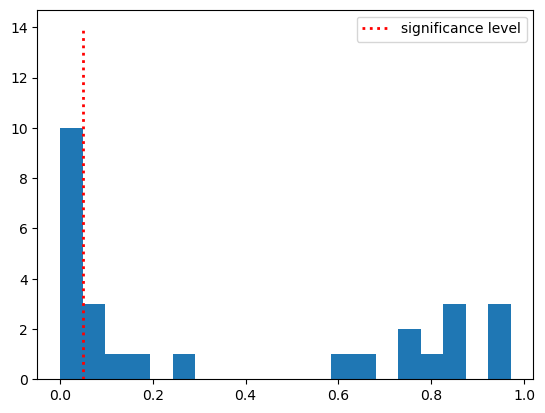

In [250]:
p_values.sort()
plt.hist(p_values, bins = 20)
plt.vlines(0.05, 0, 14, color='red', linestyle='dotted', linewidth=2, label='significance level')
plt.legend(loc = 'upper right')

In [251]:
X_train_filtered.columns.tolist()

['chars',
 'periods',
 'colon',
 'tagpermsg',
 'percent_msgwithtag',
 'verb_phrase',
 'noun_phrase',
 'sentiment',
 'org_avg_d',
 'glowbe_glowbe_dist_minval']

### ***Technique 2 - PCA***

In [252]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [253]:
number_components = 5
sklearn_pca = PCA(n_components=number_components)
X_train_PCA = sklearn_pca.fit_transform(X_train_scaled)


In [254]:
explained_var = sklearn_pca.explained_variance_ratio_

print(f"Variance explained by each PC: {explained_var.round(2)}")   
print(f"Total variance explained: {explained_var.sum():.4f}")

Variance explained by each PC: [0.24 0.15 0.06 0.05 0.04]
Total variance explained: 0.5399


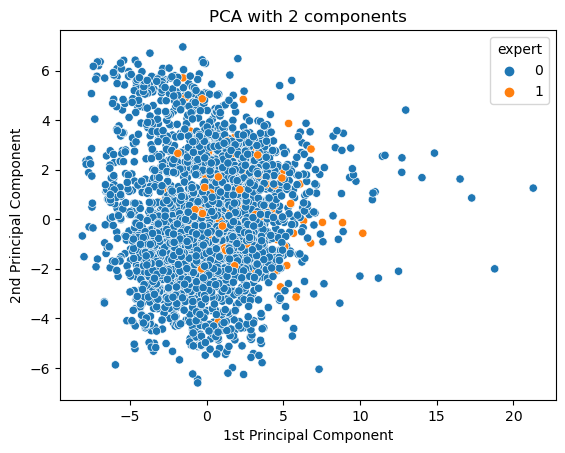

In [255]:
# Visualise the first 2 PCs
sb.scatterplot(x=X_train_PCA[:,0], 
                y=X_train_PCA[:,1],
                hue=y_train)
plt.title("PCA with 2 components")
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

In [256]:
def scale_data(data):
    scaler = StandardScaler().fit(data)
    X_train_scaled = scaler.transform(data)
    return X_train_scaled
    
def create_PCA_df(scaled_data, num_components):
    sklearn_pca = PCA(n_components=num_components)
    X_train_PCA = sklearn_pca.fit_transform(X_train_PCA)
    return X_train_PCA


## **Model Training**

Creation of 6 models:
KNN vs Decision Tree
All features vs feature subset vs PCA


Use X_train, X_train_filtered and X_train_PCA for model training

### **KNN**

In [258]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [259]:
cv_method = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=79)

knn_params = dict(clf__n_neighbors=range(1,10))

**Base case = Using all features**

In [260]:
# all featutes knn
X = X_train
y = y_train

pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', KNeighborsClassifier())])

knn_all = GridSearchCV(pipe, param_grid=knn_params, cv=cv_method, scoring= 'f1', return_train_score=True)
knn_all.fit(X, y)


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=79),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': range(1, 10)},
             return_train_score=True, scoring='f1')

In [261]:
knn_all.best_params_

{'clf__n_neighbors': 1}

In [262]:
knn_all.best_score_

0.17947468160069577

In [303]:
knn_all_results = pd.DataFrame(knn_all.cv_results_)
knn_all_mean_scores = knn_all_results['mean_test_score']
print(knn_all_mean_scores)
print(knn_all_var)
knn_all_results

0    0.179475
1    0.074077
2    0.148062
3    0.054139
4    0.112496
5    0.024755
6    0.036107
7    0.004167
8    0.012255
Name: mean_test_score, dtype: float64
0.006619935125113991


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.003533      0.000240         0.013510        0.000600   
1       0.007026      0.015913         0.014881        0.000862   
2       0.003718      0.000486         0.014204        0.000594   
3       0.004148      0.000956         0.015055        0.002875   
4       0.004365      0.000913         0.015480        0.003368   
5       0.003837      0.000491         0.015320        0.002016   
6       0.003624      0.000273         0.014672        0.000856   
7       0.003458      0.000272         0.014500        0.001110   
8       0.003600      0.000486         0.014700        0.001688   

  param_clf__n_neighbors                   params  split0_test_score  \
0                      1  {'clf__n_neighbors': 1}           0.066667   
1                      2  {'clf__n_neighbors': 2}           0.000000   
2                      3  {'clf__n_neighbors': 3}           0.111111   
3                      4  {'clf__n_neighbors': 4}           0.000000   
4                      5  {'clf__n_neighbors': 5}           0.235294   
5                      6  {'clf__n_neighbors': 6}           0.125000   
6                      7  {'clf__n_neighbors': 7}           0.235294   
7                      8  {'clf__n_neighbors': 8}           0.000000   
8                      9  {'clf__n_neighbors': 9}           0.000000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.256410           0.200000           0.216216           0.153846   
1           0.111111           0.200000           0.000000           0.000000   
2           0.153846           0.153846           0.090909           0.100000   
3           0.000000           0.125000           0.000000           0.000000   
4           0.100000           0.125000           0.090909           0.235294   
5           0.000000           0.125000           0.000000           0.000000   
6           0.000000           0.125000           0.000000           0.125000   
7           0.000000           0.000000           0.000000           0.000000   
8           0.000000           0.000000           0.000000           0.125000   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.235294           0.129032           0.111111           0.242424   
1           0.100000           0.111111           0.105263           0.000000   
2           0.250000           0.100000           0.090909           0.214286   
3           0.000000           0.000000           0.000000           0.222222   
4           0.105263           0.105263           0.000000           0.210526   
5           0.000000           0.000000           0.000000           0.000000   
6           0.000000           0.000000           0.000000           0.000000   
7           0.000000           0.000000           0.000000           0.000000   
8           0.000000           0.000000           0.000000           0.000000   

   split9_test_score  split10_test_score  split11_test_score  \
0           0.105263            0.322581            0.190476   
1           0.000000            0.125000            0.235294   
2           0.000000            0.285714            0.260870   
3           0.000000            0.125000            0.125000   
4           0.000000            0.117647            0.222222   
5           0.000000            0.000000            0.125000   
6           0.000000            0.000000            0.125000   
7           0.000000            0.000000            0.000000   
8           0.000000            0.000000            0.000000   

   split12_test_score  split13_test_score  split14_test_score  \
0            0.166667            0.146341            0.285714   
1            0.117647            0.000000            0.105263   
2            0.190476            0.000000            0.333333   
3            0.117647            0.000000            0.111111   
4            0.210526  

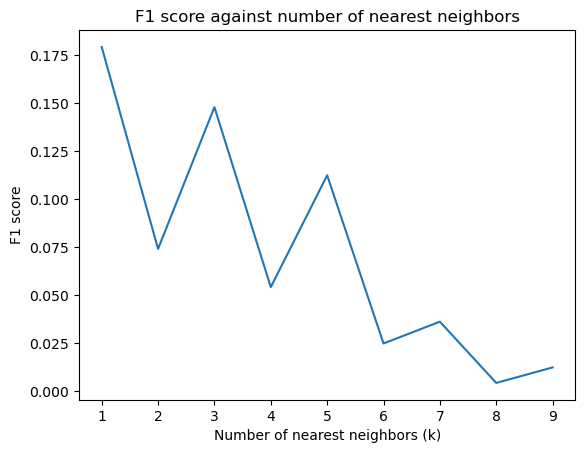

In [289]:
fig, ax = plt.subplots()
ax.plot(range(1, 10), knn_all_mean_scores)
ax.set_title('F1 score against number of nearest neighbors')
plt.xlabel('Number of nearest neighbors (k)')
plt.ylabel('F1 score')
fig.show()

In [264]:
knn_all_results_best = knn_all_results.iloc[0]
knn_all_results_best

mean_fit_time                            0.003533
std_fit_time                              0.00024
mean_score_time                           0.01351
std_score_time                             0.0006
param_clf__n_neighbors                          1
params                    {'clf__n_neighbors': 1}
split0_test_score                        0.066667
split1_test_score                         0.25641
split2_test_score                             0.2
split3_test_score                        0.216216
split4_test_score                        0.153846
split5_test_score                        0.235294
split6_test_score                        0.129032
split7_test_score                        0.111111
split8_test_score                        0.242424
split9_test_score                        0.105263
split10_test_score                       0.322581
split11_test_score                       0.190476
split12_test_score                       0.166667
split13_test_score                       0.146341


**Filtered = Using filtered features**

In [265]:
# all featutes knn
X = X_train_filtered
y = y_train

pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', KNeighborsClassifier())])

knn_filtered = GridSearchCV(pipe, param_grid=knn_params, cv=cv_method, scoring= 'f1', return_train_score=True)
knn_filtered.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=79),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': range(1, 10)},
             return_train_score=True, scoring='f1')

In [266]:
knn_filtered.best_params_

{'clf__n_neighbors': 1}

In [267]:
knn_filtered.best_score_

0.1665422498106417

In [302]:
knn_filtered_results = pd.DataFrame(knn_filtered.cv_results_)
knn_filtered_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004151      0.000519         0.012281        0.001737   
1       0.004381      0.000711         0.014249        0.003000   
2       0.004222      0.000408         0.013987        0.001381   
3       0.004388      0.000481         0.014840        0.000855   
4       0.004929      0.000835         0.017415        0.003292   
5       0.004863      0.000802         0.017901        0.003458   
6       0.004344      0.000291         0.016113        0.001438   
7       0.004286      0.000244         0.016025        0.000899   
8       0.005295      0.001112         0.019670        0.004258   

  param_clf__n_neighbors                   params  split0_test_score  \
0                      1  {'clf__n_neighbors': 1}           0.200000   
1                      2  {'clf__n_neighbors': 2}           0.117647   
2                      3  {'clf__n_neighbors': 3}           0.090909   
3                      4  {'clf__n_neighbors': 4}           0.000000   
4                      5  {'clf__n_neighbors': 5}           0.000000   
5                      6  {'clf__n_neighbors': 6}           0.000000   
6                      7  {'clf__n_neighbors': 7}           0.000000   
7                      8  {'clf__n_neighbors': 8}           0.000000   
8                      9  {'clf__n_neighbors': 9}           0.000000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.117647           0.285714           0.181818           0.129032   
1           0.125000           0.125000           0.100000           0.000000   
2           0.105263           0.095238           0.086957           0.000000   
3           0.000000           0.000000           0.111111           0.000000   
4           0.105263           0.000000           0.105263           0.000000   
5           0.117647           0.000000           0.125000           0.000000   
6           0.105263           0.000000           0.125000           0.000000   
7           0.000000           0.000000           0.125000           0.000000   
8           0.000000           0.000000           0.125000           0.000000   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0               0.00           0.176471           0.064516           0.162162   
1               0.00           0.190476           0.000000           0.125000   
2               0.08           0.347826           0.083333           0.095238   
3               0.00           0.000000           0.000000           0.125000   
4               0.00           0.117647           0.000000           0.117647   
5               0.00           0.000000           0.000000           0.000000   
6               0.00           0.000000           0.000000           0.000000   
7               0.00           0.000000           0.000000           0.000000   
8               0.00           0.000000           0.000000           0.000000   

   split9_test_score  split10_test_score  split11_test_score  \
0           0.171429            0.129032            0.125000   
1           0.000000            0.200000            0.125000   
2           0.000000            0.181818            0.090909   
3           0.000000            0.117647            0.125000   
4           0.000000            0.117647            0.100000   
5           0.000000            0.125000            0.000000   
6           0.000000            0.125000            0.117647   
7           0.000000            0.125000            0.000000   
8           0.000000            0.125000            0.000000   

   split12_test_score  split13_test_score  split14_test_score  \
0            0.150000            0.074074            0.171429   
1            0.000000            0.000000            0.111111   
2            0.100000            0.000000            0.190476   
3            0.000000            0.000000            0.000000   
4            0.111111  

In [269]:
knn_filtered_results_best = knn_filtered_results.iloc[0]
knn_filtered_results_best

mean_fit_time                            0.004151
std_fit_time                             0.000519
mean_score_time                          0.012281
std_score_time                           0.001737
param_clf__n_neighbors                          1
params                    {'clf__n_neighbors': 1}
split0_test_score                             0.2
split1_test_score                        0.117647
split2_test_score                        0.285714
split3_test_score                        0.181818
split4_test_score                        0.129032
split5_test_score                             0.0
split6_test_score                        0.176471
split7_test_score                        0.064516
split8_test_score                        0.162162
split9_test_score                        0.171429
split10_test_score                       0.129032
split11_test_score                          0.125
split12_test_score                           0.15
split13_test_score                       0.074074


**Filtered = Using PCA**

In [270]:
# all featutes knn
X = X_train_PCA
y = y_train

pipe = Pipeline([
        ('clf', KNeighborsClassifier())])


knn_PCA = GridSearchCV(pipe, param_grid=knn_params, cv=cv_method, scoring= 'f1', return_train_score=True)
knn_PCA.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=79),
             estimator=Pipeline(steps=[('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': range(1, 10)},
             return_train_score=True, scoring='f1')

In [271]:
knn_PCA.best_params_

{'clf__n_neighbors': 1}

In [272]:
knn_PCA.best_score_

0.09840003976392447

In [273]:
knn_PCA_results = pd.DataFrame(knn_PCA.cv_results_)
knn_PCA_mean_error = knn_PCA_results['std_test_score'][0] / math.sqrt(30)
knn_PCA_var = knn_PCA_results['std_test_score'][0] ** 2
print(knn_PCA_results['mean_test_score'])
print(knn_PCA_mean_error)
print(knn_PCA_var)
knn_PCA_results

0    0.098400
1    0.026967
2    0.064407
3    0.031259
4    0.033514
5    0.003922
6    0.015301
7    0.011792
8    0.011792
Name: mean_test_score, dtype: float64
0.016574694659790973
0.008241615091959103


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001968      0.000338         0.009509        0.001955   
1       0.002000      0.000345         0.010704        0.002389   
2       0.001924      0.000354         0.010078        0.002311   
3       0.001749      0.000195         0.009763        0.002226   
4       0.001742      0.000223         0.009459        0.001623   
5       0.001666      0.000248         0.009145        0.001691   
6       0.001799      0.000317         0.009768        0.001934   
7       0.001749      0.000276         0.010262        0.002146   
8       0.001910      0.000366         0.010898        0.002560   

  param_clf__n_neighbors                   params  split0_test_score  \
0                      1  {'clf__n_neighbors': 1}                0.0   
1                      2  {'clf__n_neighbors': 2}                0.0   
2                      3  {'clf__n_neighbors': 3}                0.0   
3                      4  {'clf__n_neighbors': 4}                0.0   
4                      5  {'clf__n_neighbors': 5}                0.0   
5                      6  {'clf__n_neighbors': 6}                0.0   
6                      7  {'clf__n_neighbors': 7}                0.0   
7                      8  {'clf__n_neighbors': 8}                0.0   
8                      9  {'clf__n_neighbors': 9}                0.0   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.060606           0.214286           0.129032           0.133333   
1           0.000000           0.000000           0.105263           0.125000   
2           0.000000           0.000000           0.100000           0.111111   
3           0.000000           0.000000           0.000000           0.125000   
4           0.000000           0.000000           0.000000           0.125000   
5           0.000000           0.000000           0.000000           0.000000   
6           0.000000           0.000000           0.000000           0.000000   
7           0.000000           0.000000           0.000000           0.000000   
8           0.000000           0.000000           0.000000           0.000000   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.064516           0.066667           0.160000                0.0   
1           0.000000           0.000000           0.125000                0.0   
2           0.100000           0.090909           0.200000                0.0   
3           0.000000           0.117647           0.125000                0.0   
4           0.000000           0.117647           0.111111                0.0   
5           0.000000           0.000000           0.000000                0.0   
6           0.000000           0.000000           0.125000                0.0   
7           0.000000           0.000000           0.125000                0.0   
8           0.000000           0.000000           0.125000                0.0   

   split9_test_score  split10_test_score  split11_test_score  \
0           0.060606            0.000000            0.068966   
1           0.000000            0.000000            0.000000   
2           0.000000            0.200000            0.000000   
3           0.000000            0.111111            0.000000   
4           0.000000            0.111111            0.000000   
5           0.000000            0.000000            0.000000   
6           0.000000            0.000000            0.000000   
7           0.000000            0.000000            0.000000   
8           0.000000            0.000000            0.000000   

   split12_test_score  split13_test_score  split14_test_score  \
0                 0.0            0.062500            0.375000   
1                 0.0            0.000000            0.000000   
2                 0.0            0.105263            0.105263   
3                 0.0            0.000000            0.000000   
4                 0.0  

In [274]:
knn_PCA_results_best = knn_PCA_results.iloc[0]
knn_PCA_results_best

mean_fit_time                            0.001968
std_fit_time                             0.000338
mean_score_time                          0.009509
std_score_time                           0.001955
param_clf__n_neighbors                          1
params                    {'clf__n_neighbors': 1}
split0_test_score                             0.0
split1_test_score                        0.060606
split2_test_score                        0.214286
split3_test_score                        0.129032
split4_test_score                        0.133333
split5_test_score                        0.064516
split6_test_score                        0.066667
split7_test_score                            0.16
split8_test_score                             0.0
split9_test_score                        0.060606
split10_test_score                            0.0
split11_test_score                       0.068966
split12_test_score                            0.0
split13_test_score                         0.0625


In [275]:
knn_results_best = pd.DataFrame([knn_all_results_best, knn_filtered_results_best, knn_PCA_results_best])
knn_results_best

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.003533      0.000240         0.013510        0.000600   
0       0.004151      0.000519         0.012281        0.001737   
0       0.001968      0.000338         0.009509        0.001955   

   param_clf__n_neighbors                   params  split0_test_score  \
0                       1  {'clf__n_neighbors': 1}           0.066667   
0                       1  {'clf__n_neighbors': 1}           0.200000   
0                       1  {'clf__n_neighbors': 1}           0.000000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.256410           0.200000           0.216216           0.153846   
0           0.117647           0.285714           0.181818           0.129032   
0           0.060606           0.214286           0.129032           0.133333   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.235294           0.129032           0.111111           0.242424   
0           0.000000           0.176471           0.064516           0.162162   
0           0.064516           0.066667           0.160000           0.000000   

   split9_test_score  split10_test_score  split11_test_score  \
0           0.105263            0.322581            0.190476   
0           0.171429            0.129032            0.125000   
0           0.060606            0.000000            0.068966   

   split12_test_score  split13_test_score  split14_test_score  \
0            0.166667            0.146341            0.285714   
0            0.150000            0.074074            0.171429   
0            0.000000            0.062500            0.375000   

   split15_test_score  split16_test_score  split17_test_score  \
0            0.074074            0.171429            0.000000   
0            0.235294            0.363636            0.200000   
0            0.176471            0.148148            0.206897   

   split18_test_score  split19_test_score  split20_test_score  \
0            0.242424            0.146341            0.121212   
0            0.153846            0.176471            0.250000   
0            0.160000            0.000000            0.200000   

   split21_test_score  split22_test_score  split23_test_score  \
0            0.146341            0.352941            0.235294   
0            0.071429            0.181818            0.206897   
0            0.214286            0.000000            0.153846   

   split24_test_score  split25_test_score  split26_test_score  \
0            0.352941            0.153846            0.162162   
0            0.322581            0.171429            0.200000   
0            0.074074            0.162162            0.060606   

   split27_test_score  split28_test_score  split29_test_score  \
0            0.111111            0.148148            0.137931   
0            0.206897            0.000000            0.117647   
0            0.000000            0.000000            0.000000   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.179475        0.081363                1                 1.0   
0         0.166542        0.079518                1                 1.0   
0         0.098400        0.090783                1                 1.0   

   split1_train_score  split2_train_score  split3_train_score  \
0                 1.0                 1.0                 1.0   
0                 1.0                 1.0                 1.0   
0                 1.0                 1.0                 1.0   

   split4_train_score  split5_train_score  split6_train_score  \
0                 1.0                 1.0                 1.0   
0                 1.0                 1.0                 1.0   
0                 1.0                 1.0                 1.0   

   split7_train_score  split8_train_score  split9_train_score  \
0                 1.0                 1.0                 1.0   
0              

In [276]:
knn_results_best['mean_test_score']

0    0.179475
0    0.166542
0    0.098400
Name: mean_test_score, dtype: float64

In [277]:
knn_results_best = knn_results_best.iloc[:,6:36]
knn_results_best

split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.066667           0.256410           0.200000           0.216216   
0           0.200000           0.117647           0.285714           0.181818   
0           0.000000           0.060606           0.214286           0.129032   

   split4_test_score  split5_test_score  split6_test_score  split7_test_score  \
0           0.153846           0.235294           0.129032           0.111111   
0           0.129032           0.000000           0.176471           0.064516   
0           0.133333           0.064516           0.066667           0.160000   

   split8_test_score  split9_test_score  split10_test_score  \
0           0.242424           0.105263            0.322581   
0           0.162162           0.171429            0.129032   
0           0.000000           0.060606            0.000000   

   split11_test_score  split12_test_score  split13_test_score  \
0            0.190476            0.166667            0.146341   
0            0.125000            0.150000            0.074074   
0            0.068966            0.000000            0.062500   

   split14_test_score  split15_test_score  split16_test_score  \
0            0.285714            0.074074            0.171429   
0            0.171429            0.235294            0.363636   
0            0.375000            0.176471            0.148148   

   split17_test_score  split18_test_score  split19_test_score  \
0            0.000000            0.242424            0.146341   
0            0.200000            0.153846            0.176471   
0            0.206897            0.160000            0.000000   

   split20_test_score  split21_test_score  split22_test_score  \
0            0.121212            0.146341            0.352941   
0            0.250000            0.071429            0.181818   
0            0.200000            0.214286            0.000000   

   split23_test_score  split24_test_score  split25_test_score  \
0            0.235294            0.352941            0.153846   
0            0.206897            0.322581            0.171429   
0            0.153846            0.074074            0.162162   

   split26_test_score  split27_test_score  split28_test_score  \
0            0.162162            0.111111            0.148148   
0            0.200000            0.206897            0.000000   
0            0.060606            0.000000            0.000000   

   split29_test_score  
0            0.137931  
0            0.117647  
0            0.000000

**KNN Model Training on Whole Training Set**

In [304]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_filtered, y_train)
predictions = knn.predict(X_test[X_train_filtered.columns])

In [305]:
from sklearn.metrics import f1_score, accuracy_score
print(f1_score(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.02564102564102564
0.9073170731707317


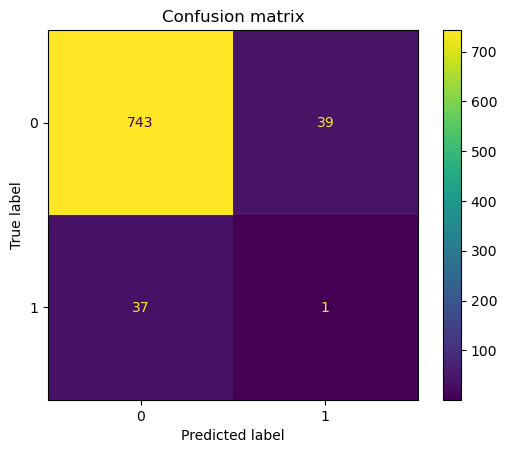

In [306]:

# Confusion matrix
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_).plot()
plt.title('Confusion matrix')
plt.show()

### **Decision Tree**

In [282]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=3,
                                    random_state=42)

dt_classifier = DecisionTreeClassifier()

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': range(2, 15),
             'max_features': range(2, 10)}

**Base dataset**

In [283]:
X = X_train.values
y = y_train

In [284]:
dt_all = GridSearchCV(estimator=dt_classifier, 
                  param_grid=params_DT, 
                  cv=cv_method,
                  scoring='f1',
                  return_train_score=True)                  

dt_all.fit(X, y)

In [121]:
features = X_train.columns.values.tolist()
features

['chars',
 'commas',
 'periods',
 'quesmark',
 'exmark',
 'colon',
 'semi',
 'punc',
 'tagpermsg',
 'mentpermsg',
 'urlpermsg',
 'percent_msgwithment',
 'percent_msgwithtag',
 'percent_msgwithurl',
 'first',
 'verb_phrase',
 'noun_phrase',
 'interj',
 'stopwords',
 'slang',
 'sentiment',
 'entity',
 'active_vb',
 'modal_vb',
 'negative_vb',
 'dt',
 'org_avg_d',
 'org_med',
 'org_avg_d_np',
 'org_med_np',
 'org_avg_d_vp',
 'org_med_vp',
 'lexco',
 'glowbe_glowbe_dist_minval',
 'glowbe_glowbe_dist_min3val',
 'glowbe_us_count_minval',
 'glowbe_us_count_min3val',
 'topic_coherence_merged']

In [122]:
dt_all.best_params_

{'criterion': 'entropy', 'max_depth': 14, 'max_features': 9}

In [123]:
dt_all.best_score_

0.1599129730199983

In [124]:
dt_all_results = pd.DataFrame(dt_all.cv_results_['params'])
dt_all_results['test_score'] = dt_all.cv_results_['mean_test_score']
dt_all_results.columns

Index(['criterion', 'max_depth', 'max_features', 'test_score'], dtype='object')

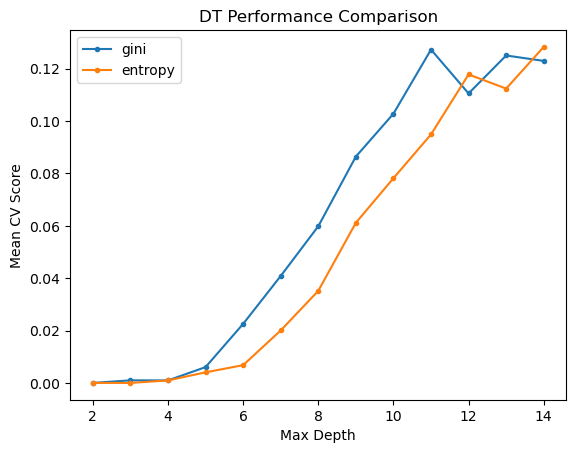

In [125]:
for i in ['gini', 'entropy']:
    temp = dt_all_results[dt_all_results['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

In [126]:
dt_all_results = pd.DataFrame(dt_all.cv_results_)
dt_all_results = dt_all_results.sort_values(by=['rank_test_score']).reset_index()
mean_error = dt_all_results['std_test_score'][0] / math.sqrt(30)
var = dt_all_results['std_test_score'][0] ** 2
print(mean_error)
print(var)
dt_all_results

0.014438504422933235
0.006254112299131878


index  mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      207       0.012649      0.001257         0.000761        0.000143   
1      205       0.010896      0.001602         0.000841        0.000201   
2      204       0.008756      0.000375         0.000695        0.000034   
3       78       0.010189      0.000910         0.000764        0.000074   
4      188       0.008614      0.000405         0.000708        0.000042   
5      201       0.005212      0.000308         0.000695        0.000038   
6       99       0.006984      0.000428         0.000726        0.000040   
7       74       0.005797      0.000476         0.000736        0.000070   
8      199       0.012060      0.000427         0.000688        0.000025   
9      194       0.007039      0.000538         0.000895        0.000102   
10      82       0.005953      0.000377         0.000809        0.000087   
11      90       0.006292      0.000993         0.000851        0.000232   
12     102       0.010794      0.001242         0.000824        0.000191   
13     206       0.011111      0.000742         0.000727        0.000084   
14     189       0.010184      0.001098         0.000798        0.000203   
15     103       0.012797      0.001384         0.000991        0.000180   
16      89       0.004875      0.000336         0.000760        0.000036   
17      95       0.011944      0.000779         0.000824        0.000083   
18     184       0.003877      0.000311         0.000717        0.000063   
19      97       0.004667      0.000340         0.000731        0.000038   
20      73       0.004496      0.000215         0.000730        0.000032   
21      77       0.009264      0.000649         0.000754        0.000066   
22      91       0.007224      0.000510         0.000852        0.000083   
23      92       0.008338      0.000492         0.000906        0.000051   
24      75       0.006724      0.000458         0.000732        0.000051   
25     182       0.011629      0.001079         0.000940        0.000163   
26     100       0.008279      0.000621         0.000748        0.000076   
27      94       0.011159      0.000816         0.000906        0.000063   
28      79       0.011353      0.000679         0.000813        0.000088   
29      93       0.009459      0.000507         0.000905        0.000050   
30     203       0.007495      0.000436         0.000708        0.000047   
31      87       0.011686      0.001233         0.000736        0.000039   
32      76       0.007839      0.000663         0.000736        0.000064   
33     179       0.007667      0.000750         0.000879        0.000177   
34     180       0.009281      0.001134         0.000916        0.000140   
35      66       0.005781      0.000366         0.000731        0.000038   
36      98       0.005890      0.000477         0.000734        0.000048   
37      85       0.009586      0.001002         0.000772        0.000096   
38      69       0.008913      0.000689         0.000767        0.000095   
39      84       0.008233      0.000542         0.000762        0.000065   
40      63       0.010764      0.000785         0.000724        0.000036   
41     196       0.009792      0.001152         0.000971        0.000183   
42     193       0.006369      0.001295         0.000969        0.000268   
43     190       0.012452      0.000753         0.000905        0.000092   
44     187       0.007473      0.000352         0.000701        0.000061   
45     197       0.010671      0.000609         0.000911        0.000097   
46      70       0.010468      0.000864         0.000755        0.000054   
47     198       0.011045      0.000545         0.000721        0.000062   
48      67       0.006847      0.000617         0.000753        0.000059   
49      86       0.010710      0.000983         0.000789        0.000082   
50     185       0.004992      0.000321         0.000700        0.000044   
51      59       0.006372      0.000547         0.000

In [127]:
dt_all_results_best = dt_all_results.iloc[0]
dt_all_results_best

index                                                                207
mean_fit_time                                                   0.012649
std_fit_time                                                    0.001257
mean_score_time                                                 0.000761
std_score_time                                                  0.000143
param_criterion                                                  entropy
param_max_depth                                                       14
param_max_features                                                     9
params                 {'criterion': 'entropy', 'max_depth': 14, 'max...
split0_test_score                                                  0.125
split1_test_score                                               0.137931
split2_test_score                                               0.242424
split3_test_score                                               0.266667
split4_test_score                                  

**Filtered subset**

In [128]:
X = X_train_filtered.values
y = y_train

In [129]:
dt_classifier = DecisionTreeClassifier()

dt_filtered = GridSearchCV(estimator=dt_classifier, 
                  param_grid=params_DT, 
                  cv=cv_method,
                  scoring='f1',
                  return_train_score=True)                  

dt_filtered.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 15),
                         'max_features': range(2, 10)},
             return_train_score=True, scoring='f1')

In [130]:
features = X_train_filtered.columns.values.tolist()
features

['chars',
 'periods',
 'colon',
 'tagpermsg',
 'percent_msgwithtag',
 'verb_phrase',
 'noun_phrase',
 'sentiment',
 'org_avg_d',
 'glowbe_glowbe_dist_minval']

In [131]:
dt_filtered.best_params_

{'criterion': 'entropy', 'max_depth': 14, 'max_features': 9}

In [132]:
dt_filtered.best_score_

0.11604169547178758

In [133]:
dt_filtered_results = pd.DataFrame(dt_filtered.cv_results_['params'])
dt_filtered_results['test_score'] = dt_filtered.cv_results_['mean_test_score']
dt_filtered_results.columns

Index(['criterion', 'max_depth', 'max_features', 'test_score'], dtype='object')

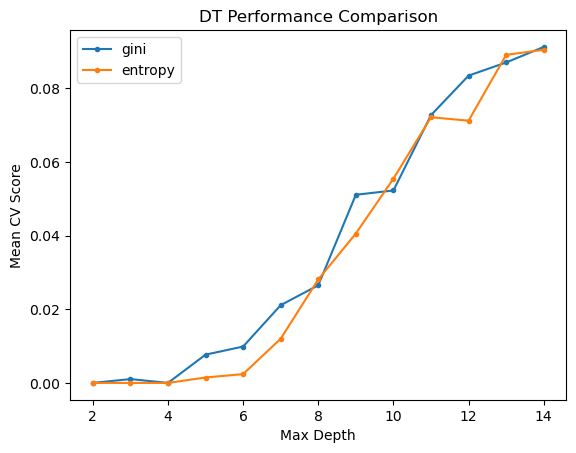

In [134]:
for i in ['gini', 'entropy']:
    temp = dt_filtered_results[dt_filtered_results['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

In [135]:
dt_filtered_results = pd.DataFrame(dt_filtered.cv_results_)
dt_filtered_results = dt_filtered_results.sort_values(by=['rank_test_score']).reset_index()
mean_error = dt_filtered_results['std_test_score'][0] / math.sqrt(30)
var = dt_filtered_results['std_test_score'][0] ** 2
print(mean_error)
print(var)
dt_filtered_results

0.018007047375276922
0.009727612655264027


index  mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      207       0.014473      0.000544         0.000710        0.000062   
1      196       0.010191      0.000846         0.000766        0.000168   
2       89       0.004916      0.000382         0.000716        0.000070   
3       97       0.004812      0.000273         0.000680        0.000026   
4      101       0.010694      0.000619         0.000692        0.000031   
5      206       0.012808      0.000445         0.000680        0.000030   
6      103       0.014092      0.000947         0.000706        0.000054   
7       99       0.007814      0.000571         0.000689        0.000036   
8      203       0.008500      0.000343         0.000684        0.000046   
9       87       0.013463      0.000674         0.000705        0.000049   
10     183       0.013397      0.000420         0.000675        0.000030   
11     182       0.012933      0.002015         0.000748        0.000137   
12      74       0.005913      0.000383         0.000699        0.000037   
13     192       0.004783      0.000792         0.000844        0.000182   
14      90       0.006061      0.000379         0.000699        0.000071   
15     205       0.011524      0.000455         0.000693        0.000052   
16      98       0.006318      0.000307         0.000691        0.000033   
17      93       0.010471      0.000607         0.000705        0.000027   
18      83       0.007779      0.000483         0.000721        0.000094   
19      88       0.003484      0.000251         0.000697        0.000044   
20     194       0.006987      0.000254         0.000680        0.000031   
21     199       0.015611      0.001845         0.000955        0.000136   
22     198       0.013009      0.001487         0.000747        0.000160   
23     102       0.012125      0.000668         0.000705        0.000052   
24     197       0.011351      0.000411         0.000719        0.000082   
25      85       0.010414      0.000703         0.000722        0.000058   
26     200       0.005173      0.001067         0.000943        0.000253   
27     189       0.011322      0.001142         0.000715        0.000134   
28      86       0.011723      0.000534         0.000693        0.000039   
29     204       0.009882      0.000377         0.000676        0.000028   
30     195       0.008656      0.000606         0.000724        0.000112   
31      81       0.004932      0.000343         0.000699        0.000043   
32     190       0.012630      0.000547         0.000748        0.000115   
33      75       0.007222      0.000453         0.000701        0.000032   
34      82       0.006202      0.000396         0.000704        0.000042   
35     177       0.006054      0.000809         0.000884        0.000199   
36      80       0.003412      0.000211         0.000700        0.000039   
37      69       0.010176      0.000724         0.000738        0.000075   
38      77       0.010444      0.000591         0.000790        0.000074   
39     186       0.006732      0.000283         0.000674        0.000033   
40      92       0.009171      0.000537         0.000721        0.000063   
41      95       0.014196      0.000945         0.000737        0.000077   
42      72       0.003416      0.000175         0.000695        0.000041   
43      78       0.011771      0.000685         0.000741        0.000101   
44      91       0.007821      0.000522         0.000715        0.000078   
45      94       0.012854      0.001470         0.000794        0.000180   
46     180       0.009860      0.000345         0.000878        0.000110   
47     193       0.006353      0.001043         0.000896        0.000273   
48     187       0.008210      0.000437         0.000708        0.000093   
49     191       0.014865      0.001424         0.000854        0.000186   
50     202       0.008415      0.001426         0.000942        0.000291   
51     100       0.009106      0.000475         0.000

In [136]:
dt_filtered_results_best = dt_filtered_results.iloc[0]
dt_filtered_results_best

index                                                                207
mean_fit_time                                                   0.014473
std_fit_time                                                    0.000544
mean_score_time                                                  0.00071
std_score_time                                                  0.000062
param_criterion                                                  entropy
param_max_depth                                                       14
param_max_features                                                     9
params                 {'criterion': 'entropy', 'max_depth': 14, 'max...
split0_test_score                                                 0.3125
split1_test_score                                               0.071429
split2_test_score                                               0.086957
split3_test_score                                                    0.0
split4_test_score                                  

**PCA subset**

In [137]:
X = X_train_PCA
y = y_train


In [138]:
dt_classifier = DecisionTreeClassifier()

dt_PCA = GridSearchCV(estimator=dt_classifier, 
                  param_grid=params_DT, 
                  cv=cv_method,
                  scoring='f1',
                  return_train_score=True)                  

dt_PCA.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 15),
                         'max_features': range(2, 10)},
             return_train_score=True, scoring='f1')

In [139]:
dt_PCA.best_params_

{'criterion': 'gini', 'max_depth': 13, 'max_features': 2}

In [140]:
dt_PCA.best_score_

0.09491158422566508

In [141]:
dt_PCA_results = pd.DataFrame(dt_PCA.cv_results_['params'])
dt_PCA_results['test_score'] = dt_PCA.cv_results_['mean_test_score']
dt_PCA_results.columns

Index(['criterion', 'max_depth', 'max_features', 'test_score'], dtype='object')

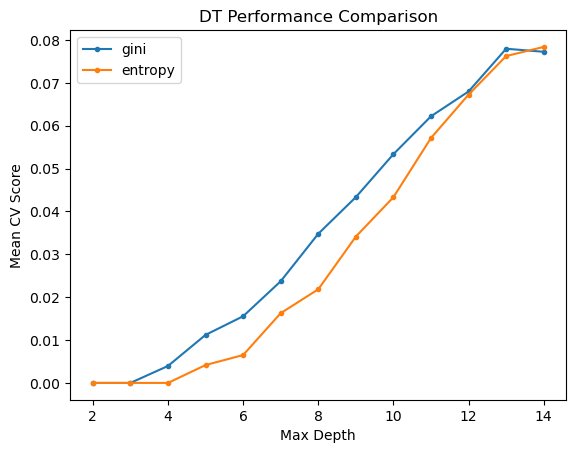

In [142]:
for i in ['gini', 'entropy']:
    temp = dt_PCA_results[dt_PCA_results['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

In [143]:
dt_PCA_results = pd.DataFrame(dt_PCA.cv_results_)
dt_PCA_results = dt_PCA_results.sort_values(by=['rank_test_score']).reset_index()
mean_error = dt_PCA_results['std_test_score'][0] / math.sqrt(30)
var = dt_PCA_results['std_test_score'][0] ** 2
print(mean_error)
print(var)
dt_PCA_results

0.014059650189353868
0.005930212903409947


index  mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       88       0.005424      0.000552         0.001020        0.000176   
1      201       0.008191      0.000606         0.000907        0.000164   
2       96       0.005523      0.000612         0.000914        0.000162   
3      204       0.011780      0.000396         0.000689        0.000055   
4      198       0.011860      0.000888         0.000730        0.000107   
5      195       0.011693      0.000396         0.000675        0.000026   
6       89       0.007662      0.000982         0.001026        0.000218   
7       99       0.012494      0.001493         0.000953        0.000205   
8      186       0.009387      0.000337         0.000673        0.000026   
9      207       0.011755      0.000430         0.000673        0.000022   
10     100       0.013484      0.001403         0.001165        0.000198   
11     102       0.011932      0.000752         0.000945        0.000151   
12     199       0.013222      0.002057         0.000969        0.000181   
13      82       0.008734      0.000470         0.000734        0.000057   
14      81       0.006506      0.000375         0.000733        0.000105   
15     200       0.005863      0.000291         0.000819        0.000089   
16     103       0.011413      0.000641         0.000734        0.000063   
17      94       0.012890      0.001664         0.001030        0.000238   
18     203       0.011654      0.000436         0.000688        0.000051   
19      90       0.011791      0.001261         0.001293        0.000226   
20     193       0.007554      0.000299         0.000684        0.000040   
21     206       0.011716      0.000403         0.000675        0.000023   
22     197       0.011697      0.000302         0.000712        0.000077   
23     101       0.013114      0.001512         0.001129        0.000236   
24      91       0.012884      0.001449         0.001111        0.000219   
25      92       0.011637      0.000552         0.000881        0.000139   
26     196       0.011602      0.000437         0.000689        0.000110   
27     194       0.009729      0.000893         0.000684        0.000038   
28     202       0.010728      0.001185         0.000919        0.000182   
29     185       0.007451      0.000242         0.000680        0.000040   
30      73       0.006437      0.000452         0.000695        0.000055   
31      84       0.011250      0.000512         0.000869        0.000076   
32      95       0.013474      0.001784         0.001084        0.000298   
33      93       0.012340      0.001688         0.000952        0.000227   
34     188       0.011569      0.001027         0.000684        0.000042   
35     189       0.011405      0.000296         0.000675        0.000033   
36     205       0.011779      0.000385         0.000677        0.000025   
37      98       0.010014      0.001123         0.000947        0.000176   
38     187       0.011540      0.000413         0.000687        0.000046   
39      83       0.011186      0.000659         0.000830        0.000095   
40      79       0.010306      0.000458         0.000687        0.000044   
41      97       0.007801      0.000871         0.000934        0.000209   
42      64       0.004416      0.000338         0.000717        0.000150   
43      85       0.010759      0.000646         0.000770        0.000107   
44      72       0.004427      0.000223         0.000691        0.000075   
45     178       0.010257      0.001178         0.000920        0.000151   
46     191       0.011493      0.000332         0.000698        0.000063   
47     190       0.011437      0.000379         0.000680        0.000063   
48      78       0.010682      0.000599         0.000770        0.000110   
49      80       0.004675      0.000306         0.000715        0.000048   
50      70       0.011469      0.001356         0.001018        0.000208   
51     192       0.005410      0.000211         0.000

In [144]:
dt_PCA_results_best = dt_PCA_results.iloc[0]
dt_PCA_results_best

index                                                                 88
mean_fit_time                                                   0.005424
std_fit_time                                                    0.000552
mean_score_time                                                  0.00102
std_score_time                                                  0.000176
param_criterion                                                     gini
param_max_depth                                                       13
param_max_features                                                     2
params                 {'criterion': 'gini', 'max_depth': 13, 'max_fe...
split0_test_score                                               0.086957
split1_test_score                                                 0.3125
split2_test_score                                               0.074074
split3_test_score                                                    0.0
split4_test_score                                  

In [145]:
dt_results_best = pd.DataFrame([dt_all_results_best, dt_filtered_results_best, dt_PCA_results_best])
dt_results_best

index  mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0    207       0.012649      0.001257         0.000761        0.000143   
0    207       0.014473      0.000544         0.000710        0.000062   
0     88       0.005424      0.000552         0.001020        0.000176   

  param_criterion  param_max_depth  param_max_features  \
0         entropy               14                   9   
0         entropy               14                   9   
0            gini               13                   2   

                                              params  split0_test_score  \
0  {'criterion': 'entropy', 'max_depth': 14, 'max...           0.125000   
0  {'criterion': 'entropy', 'max_depth': 14, 'max...           0.312500   
0  {'criterion': 'gini', 'max_depth': 13, 'max_fe...           0.086957   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.137931           0.242424           0.266667           0.181818   
0           0.071429           0.086957           0.000000           0.000000   
0           0.312500           0.074074           0.000000           0.153846   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.095238           0.074074           0.074074           0.181818   
0           0.074074           0.080000           0.095238           0.378378   
0           0.076923           0.086957           0.000000           0.080000   

   split9_test_score  split10_test_score  split11_test_score  \
0           0.142857            0.230769            0.206897   
0           0.181818            0.064516            0.275862   
0           0.181818            0.000000            0.000000   

   split12_test_score  split13_test_score  split14_test_score  \
0            0.114286            0.137931            0.206897   
0            0.133333            0.000000            0.090909   
0            0.222222            0.074074            0.080000   

   split15_test_score  split16_test_score  split17_test_score  \
0            0.240000            0.121212            0.125000   
0            0.000000            0.000000            0.214286   
0            0.066667            0.000000            0.090909   

   split18_test_score  split19_test_score  split20_test_score  \
0            0.057143            0.080000            0.176471   
0            0.142857            0.000000            0.153846   
0            0.222222            0.064516            0.086957   

   split21_test_score  split22_test_score  split23_test_score  \
0            0.083333            0.413793            0.129032   
0            0.260870            0.153846            0.064516   
0            0.086957            0.071429            0.242424   

   split24_test_score  split25_test_score  split26_test_score  \
0            0.222222            0.142857            0.142857   
0            0.058824            0.000000            0.162162   
0            0.142857            0.068966            0.000000   

   split27_test_score  split28_test_score  split29_test_score  \
0            0.228571            0.000000            0.216216   
0            0.148148            0.193548            0.083333   
0            0.142857            0.074074            0.057143   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.159913        0.079083                1            0.849315   
0         0.116042        0.098629                1            0.789474   
0         0.094912        0.077008                1            0.739726   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.929134            0.940741            0.847458   
0            0.877470            0.820084            0.912698   
0            0.853556            0.753247            0.731481   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.923664            0.757709            0.945055   
0      

In [146]:
dt_results_best['mean_test_score']

0    0.159913
0    0.116042
0    0.094912
Name: mean_test_score, dtype: float64

In [147]:
dt_results_best = dt_results_best.iloc[:,9:39]

In [148]:
dt_results_best

split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.125000           0.137931           0.242424           0.266667   
0           0.312500           0.071429           0.086957           0.000000   
0           0.086957           0.312500           0.074074           0.000000   

   split4_test_score  split5_test_score  split6_test_score  split7_test_score  \
0           0.181818           0.095238           0.074074           0.074074   
0           0.000000           0.074074           0.080000           0.095238   
0           0.153846           0.076923           0.086957           0.000000   

   split8_test_score  split9_test_score  split10_test_score  \
0           0.181818           0.142857            0.230769   
0           0.378378           0.181818            0.064516   
0           0.080000           0.181818            0.000000   

   split11_test_score  split12_test_score  split13_test_score  \
0            0.206897            0.114286            0.137931   
0            0.275862            0.133333            0.000000   
0            0.000000            0.222222            0.074074   

   split14_test_score  split15_test_score  split16_test_score  \
0            0.206897            0.240000            0.121212   
0            0.090909            0.000000            0.000000   
0            0.080000            0.066667            0.000000   

   split17_test_score  split18_test_score  split19_test_score  \
0            0.125000            0.057143            0.080000   
0            0.214286            0.142857            0.000000   
0            0.090909            0.222222            0.064516   

   split20_test_score  split21_test_score  split22_test_score  \
0            0.176471            0.083333            0.413793   
0            0.153846            0.260870            0.153846   
0            0.086957            0.086957            0.071429   

   split23_test_score  split24_test_score  split25_test_score  \
0            0.129032            0.222222            0.142857   
0            0.064516            0.058824            0.000000   
0            0.242424            0.142857            0.068966   

   split26_test_score  split27_test_score  split28_test_score  \
0            0.142857            0.228571            0.000000   
0            0.162162            0.148148            0.193548   
0            0.000000            0.142857            0.074074   

   split29_test_score  
0            0.216216  
0            0.083333  
0            0.057143

**Decision Tree Model Training on Whole Training Set**

In [150]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=14, max_features = 7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, max_features=7)

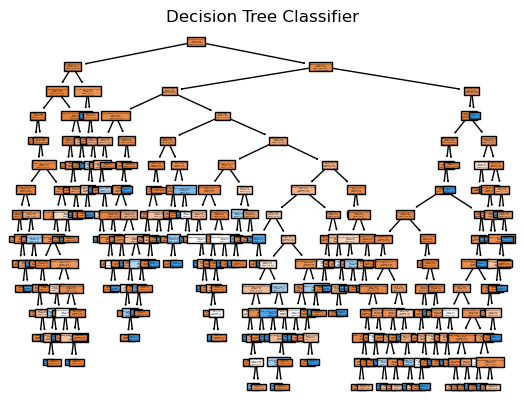

In [151]:
plot_tree(dt, # the DT classifier
          feature_names=X_train.columns.values.tolist(), # feature names
          class_names={0: 'Non_expert', 1:'Expert'}, # class labels
          filled=True # fill in the rectangles
         )

plt.title("Decision Tree Classifier")
plt.savefig('decision_tree.jpg')

plt.show()

In [152]:
predictions = dt.predict(X_test)

In [153]:
from sklearn.metrics import f1_score, accuracy_score
print(f1_score(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.14814814814814817
0.9158536585365854


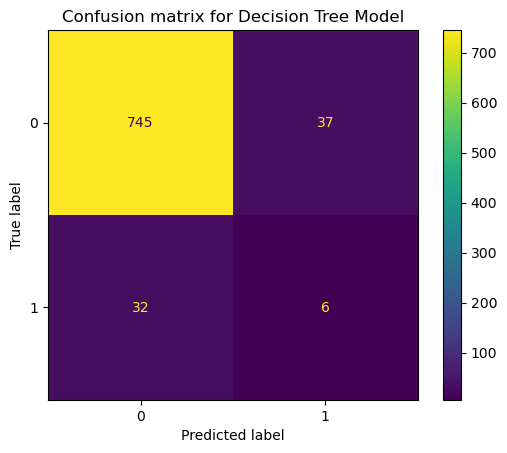

In [154]:
# Confusion matrix
cm = confusion_matrix(y_test, predictions, labels=dt.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_).plot()
plt.title('Confusion matrix for Decision Tree Model')
plt.show()

In [156]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[745,  37],
       [ 32,   6]])

In [157]:
# Precision score
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.13953488372093023

In [158]:
# Recall score
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.15789473684210525

In [159]:
# Accuracy
from sklearn.metrics import classification_report
classification_report(y_test, predictions, target_names=['Expert', 'Non-expert'])

'              precision    recall  f1-score   support\n\n      Expert       0.96      0.95      0.96       782\n  Non-expert       0.14      0.16      0.15        38\n\n    accuracy                           0.92       820\n   macro avg       0.55      0.56      0.55       820\nweighted avg       0.92      0.92      0.92       820\n'

Best hyperparameters of each model

In [160]:
labels = ['KNN all', 'KNN filtered', 'KNN PCA', 'DT all', 'DT filtered', 'DT PCA']

In [161]:
knn_results_best

split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.066667           0.256410           0.200000           0.216216   
0           0.200000           0.117647           0.285714           0.181818   
0           0.076923           0.060606           0.206897           0.129032   

   split4_test_score  split5_test_score  split6_test_score  split7_test_score  \
0           0.153846           0.235294           0.129032           0.111111   
0           0.129032           0.000000           0.176471           0.064516   
0           0.133333           0.066667           0.066667           0.129032   

   split8_test_score  split9_test_score  split10_test_score  \
0           0.242424           0.105263            0.322581   
0           0.162162           0.171429            0.129032   
0           0.000000           0.058824            0.000000   

   split11_test_score  split12_test_score  split13_test_score  \
0            0.190476            0.166667            0.146341   
0            0.125000            0.150000            0.074074   
0            0.000000            0.000000            0.058824   

   split14_test_score  split15_test_score  split16_test_score  \
0            0.285714            0.074074            0.171429   
0            0.171429            0.235294            0.363636   
0            0.342857            0.176471            0.153846   

   split17_test_score  split18_test_score  split19_test_score  \
0            0.000000            0.242424            0.146341   
0            0.200000            0.153846            0.176471   
0            0.266667            0.153846            0.066667   

   split20_test_score  split21_test_score  split22_test_score  \
0            0.121212            0.146341            0.352941   
0            0.250000            0.071429            0.181818   
0            0.200000            0.206897            0.000000   

   split23_test_score  split24_test_score  split25_test_score  \
0            0.235294            0.352941            0.153846   
0            0.206897            0.322581            0.171429   
0            0.206897            0.071429            0.153846   

   split26_test_score  split27_test_score  split28_test_score  \
0            0.162162            0.111111            0.148148   
0            0.200000            0.206897            0.000000   
0            0.108108            0.000000            0.000000   

   split29_test_score  
0            0.137931  
0            0.117647  
0            0.000000

In [162]:
dt_results_best

split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.125000           0.137931           0.242424           0.266667   
0           0.312500           0.071429           0.086957           0.000000   
0           0.086957           0.312500           0.074074           0.000000   

   split4_test_score  split5_test_score  split6_test_score  split7_test_score  \
0           0.181818           0.095238           0.074074           0.074074   
0           0.000000           0.074074           0.080000           0.095238   
0           0.153846           0.076923           0.086957           0.000000   

   split8_test_score  split9_test_score  split10_test_score  \
0           0.181818           0.142857            0.230769   
0           0.378378           0.181818            0.064516   
0           0.080000           0.181818            0.000000   

   split11_test_score  split12_test_score  split13_test_score  \
0            0.206897            0.114286            0.137931   
0            0.275862            0.133333            0.000000   
0            0.000000            0.222222            0.074074   

   split14_test_score  split15_test_score  split16_test_score  \
0            0.206897            0.240000            0.121212   
0            0.090909            0.000000            0.000000   
0            0.080000            0.066667            0.000000   

   split17_test_score  split18_test_score  split19_test_score  \
0            0.125000            0.057143            0.080000   
0            0.214286            0.142857            0.000000   
0            0.090909            0.222222            0.064516   

   split20_test_score  split21_test_score  split22_test_score  \
0            0.176471            0.083333            0.413793   
0            0.153846            0.260870            0.153846   
0            0.086957            0.086957            0.071429   

   split23_test_score  split24_test_score  split25_test_score  \
0            0.129032            0.222222            0.142857   
0            0.064516            0.058824            0.000000   
0            0.242424            0.142857            0.068966   

   split26_test_score  split27_test_score  split28_test_score  \
0            0.142857            0.228571            0.000000   
0            0.162162            0.148148            0.193548   
0            0.000000            0.142857            0.074074   

   split29_test_score  
0            0.216216  
0            0.083333  
0            0.057143

In [298]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

results_best = knn_results_best.append(dt_results_best)
results_best = results_best.reset_index()
results_best

results_best1 = results_best.iloc[:,0:11]
results_best2 = results_best.iloc[:,11:21]
results_best3 = results_best.iloc[:,21:31]

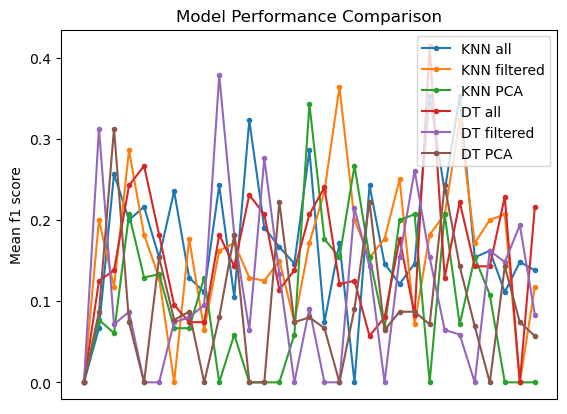

In [291]:
# plot of everything
for index, row in results_best.iterrows():
    plt.plot(row, marker = '.')

plt.legend(labels)
plt.xticks([])
plt.ylabel("Mean f1 score")
plt.title("Model Performance Comparison")
plt.show()


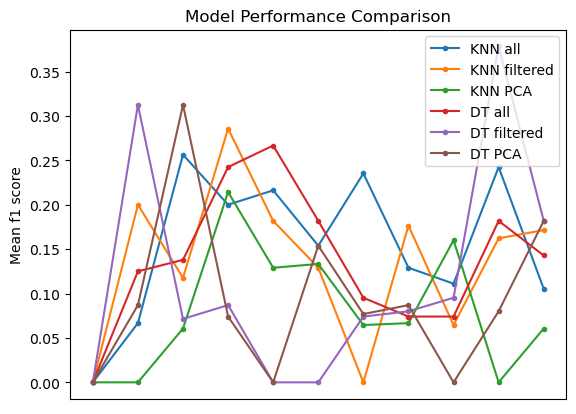

In [299]:
# plot 1
for index, row in results_best1.iterrows():
    plt.plot(row, marker = '.')

plt.legend(labels)
plt.xticks([])
plt.ylabel("Mean f1 score")
plt.title("Model Performance Comparison 1 - 10")
plt.show()

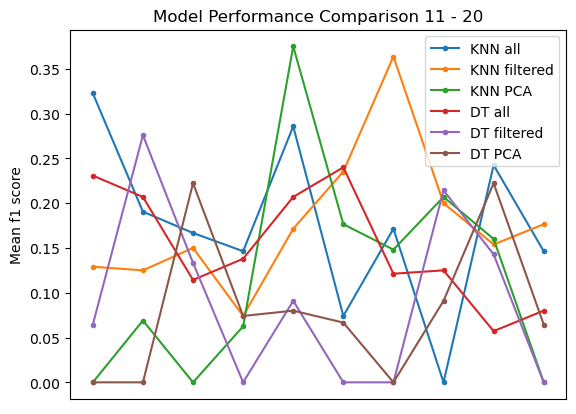

In [300]:
# plot 2
for index, row in results_best2.iterrows():
    plt.plot(row, marker = '.')

plt.legend(labels)
plt.xticks([])
plt.ylabel("Mean f1 score")
plt.title("Model Performance Comparison 11 - 20")
plt.show()

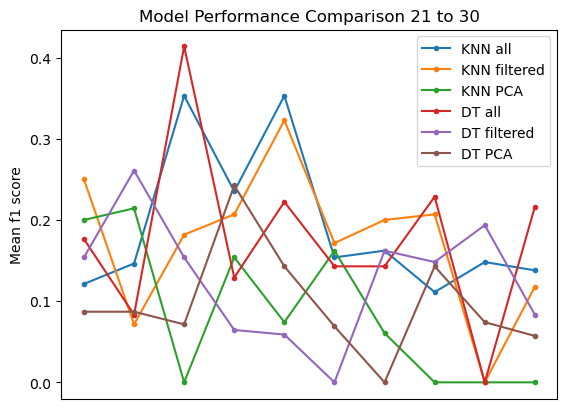

In [301]:
# plot 3
for index, row in results_best3.iterrows():
    plt.plot(row, marker = '.')

plt.legend(labels)
plt.xticks([])
plt.ylabel("Mean f1 score")
plt.title("Model Performance Comparison 21 to 30")
plt.show()